In [1]:
#Importing Necessary dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn import tree
from IPython.display import SVG
from IPython.display import display

sns.set_style('darkgrid')

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv("SeoulBikeData.csv")
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
# Last five observations
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30-11-2018               1003    19              4.2           34   
8756  30-11-2018                764    20              3.4           37   
8757  30-11-2018                694    21              2.6           39   
8758  30-11-2018                712    22              2.1           41   
8759  30-11-2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## Data Inispection

In [4]:
# Checking shape of the dataset
df.shape

(8760, 14)

In [5]:
# Checking columns name of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Basic description of Dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

## Handling Duplicate Values

In [8]:
# Checking for number of duplicated values
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


## Handling Null / Missing Values

In [9]:
# Checking for number of null values
count_null=pd.DataFrame(df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
count_null

number_of_nulls_values
Date                                            0
Rented Bike Count                               0
Hour                                            0
Temperature(°C)                                 0
Humidity(%)                                     0
Wind speed (m/s)                                0
Visibility (10m)                                0
Dew point temperature(°C)                       0
Solar Radiation (MJ/m2)                         0
Rainfall(mm)                                    0
Snowfall (cm)                                   0
Seasons                                         0
Holiday                                         0
Functioning Day                                 0

## Handling Outliers

### Categorical variables 

In [10]:
# Find categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*50)
print(categorical_variables)

There are 4 categorical variables
----------------------------------------------------------------------------------------------------
['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [11]:
# Checking number of categories in each categorical variables
categorical_variables_df=df[categorical_variables]
for i in categorical_variables_df.columns:
    print(categorical_variables_df[i].value_counts())
    print('--'*50)

Date
01-12-2017    24
09-08-2018    24
07-08-2018    24
06-08-2018    24
05-08-2018    24
              ..
31-03-2018    24
30-03-2018    24
29-03-2018    24
28-03-2018    24
30-11-2018    24
Name: count, Length: 365, dtype: int64
----------------------------------------------------------------------------------------------------
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


## Numerical Variables

In [12]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*50)
print(numerical_variables)

There are 10 numerical variables
----------------------------------------------------------------------------------------------------
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [13]:
# Checking number of categories
numerical_variables_df=df[numerical_variables]
for i in numerical_variables_df.columns:
    print(numerical_variables_df[i].value_counts())
    print('--'*50)

Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64
----------------------------------------------------------------------------------------------------
Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Temperature(°C)
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: count, Length: 546, dtype: int64
----------------------------------------------------------------------------------------------------
Humidity(%)
53    173
97    173
43    164
57    1

____________________________________________________________________________________________________


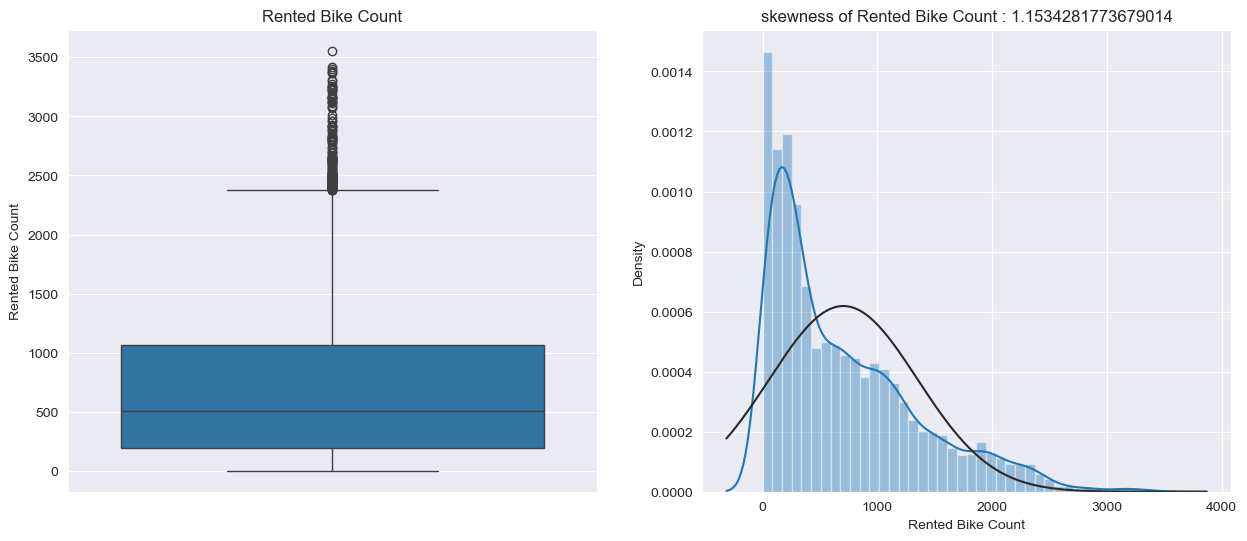

____________________________________________________________________________________________________


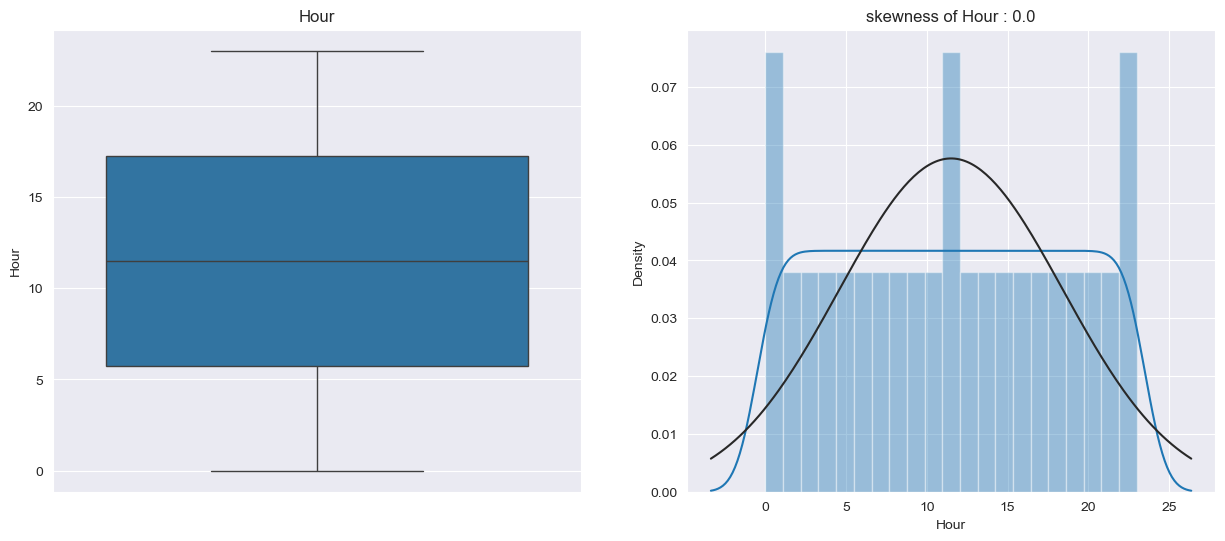

____________________________________________________________________________________________________


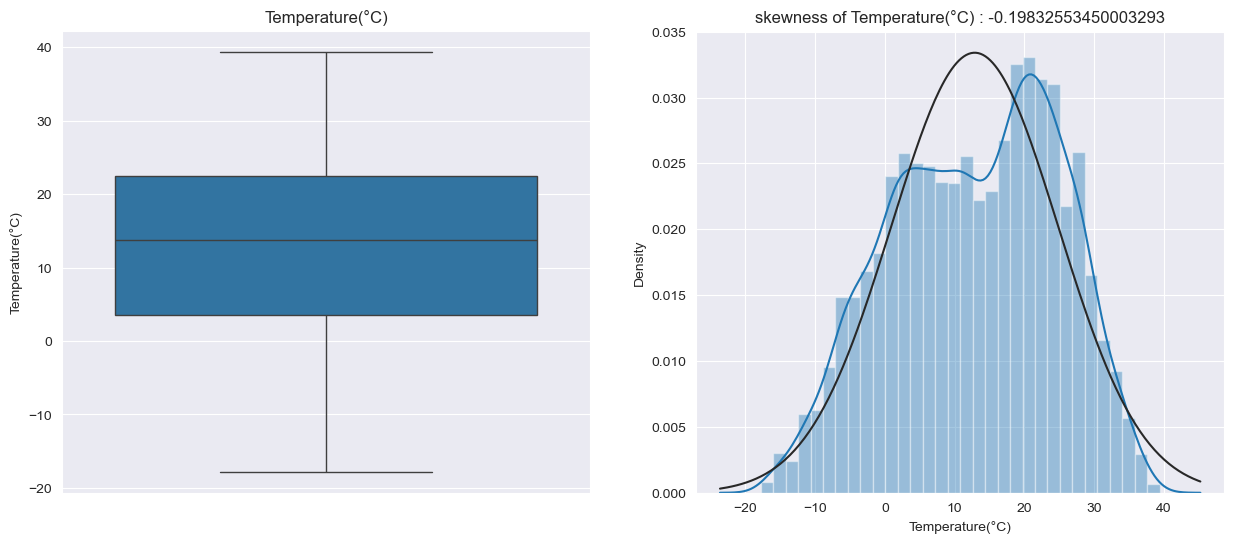

____________________________________________________________________________________________________


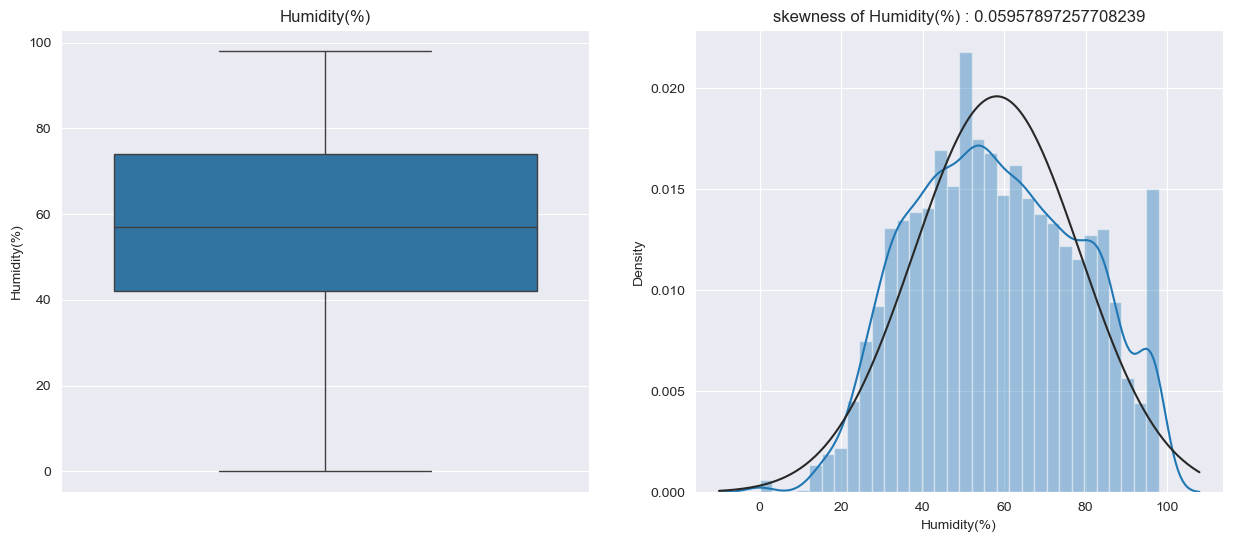

____________________________________________________________________________________________________


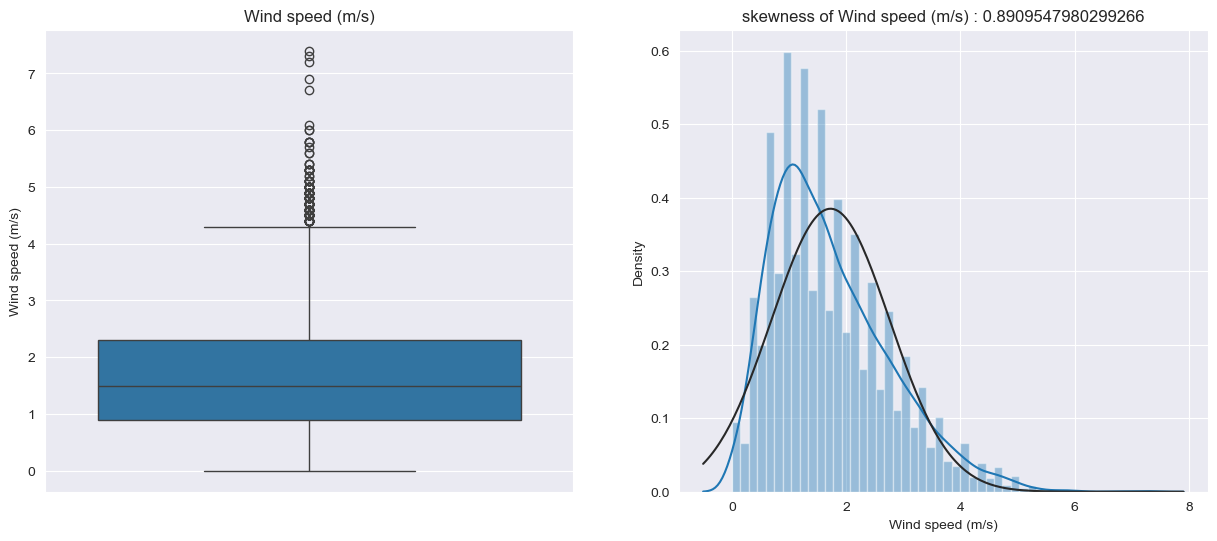

____________________________________________________________________________________________________


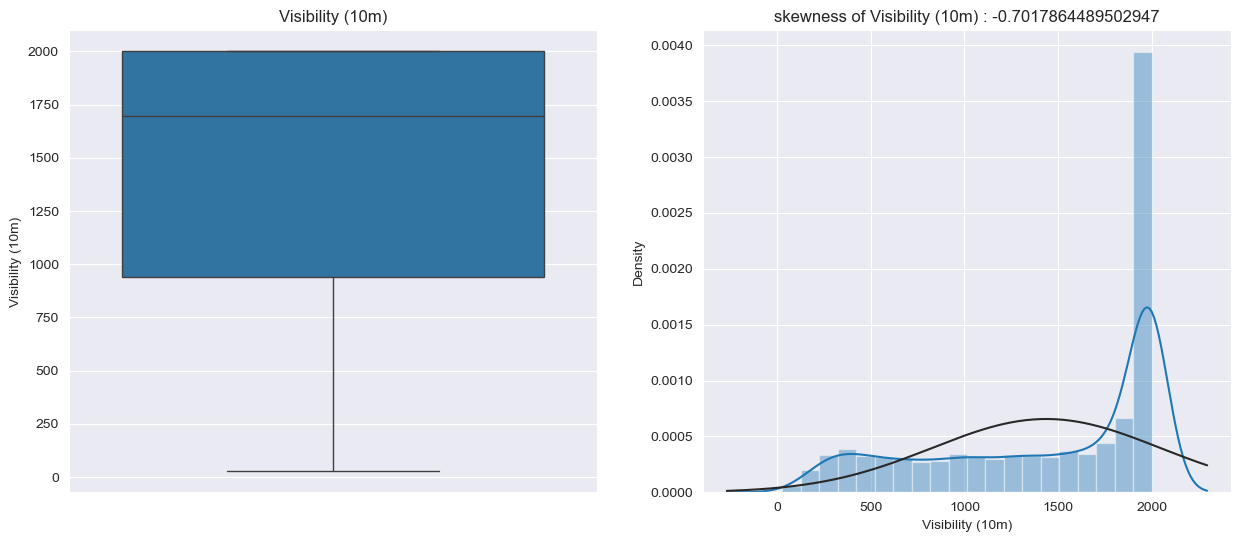

____________________________________________________________________________________________________


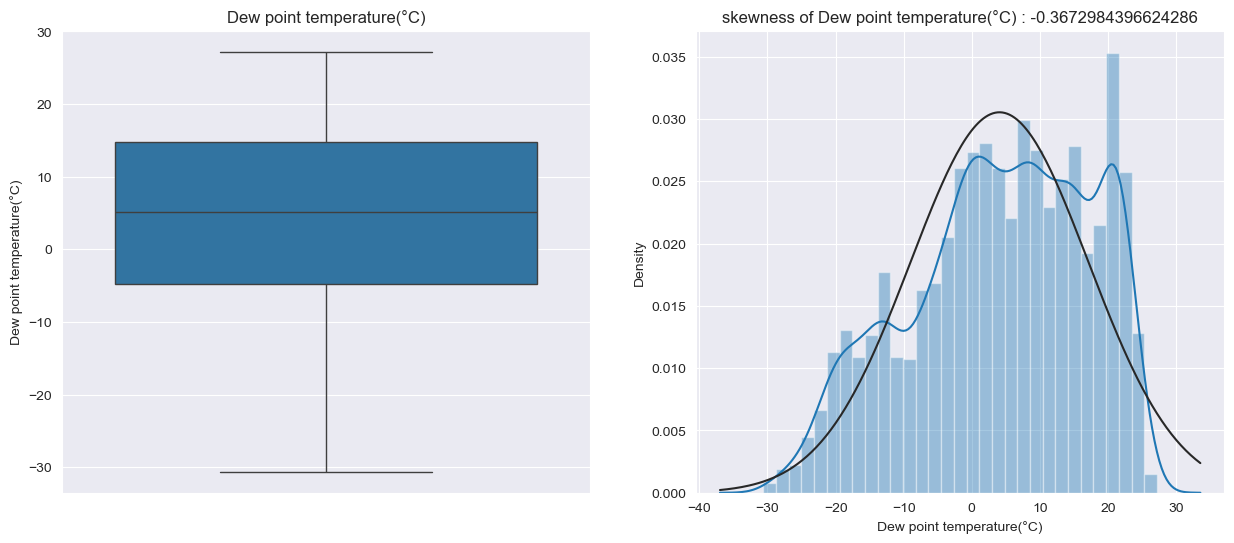

____________________________________________________________________________________________________


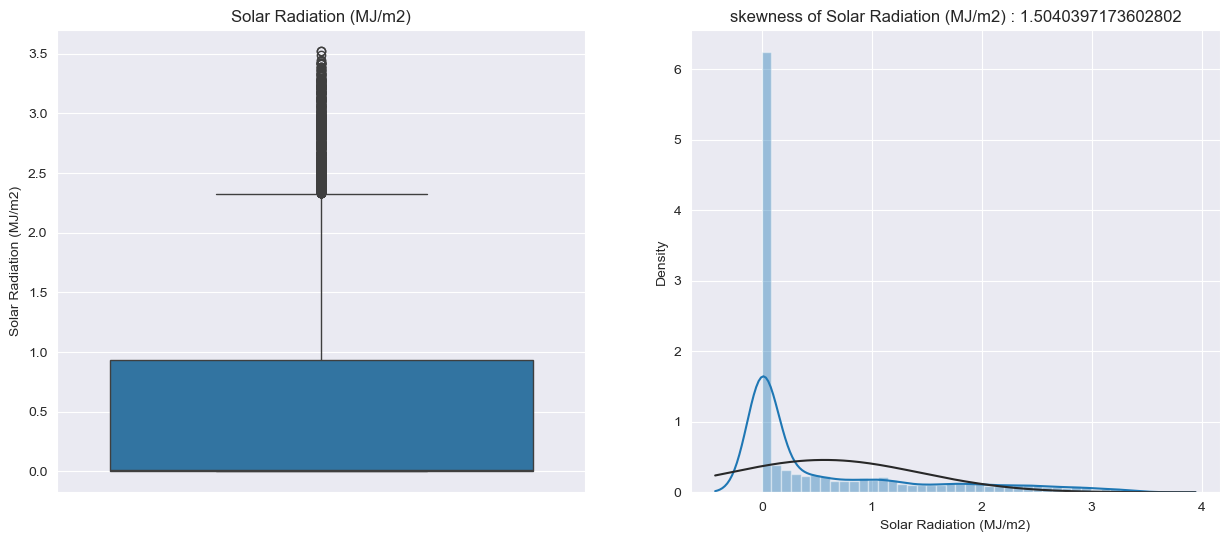

____________________________________________________________________________________________________


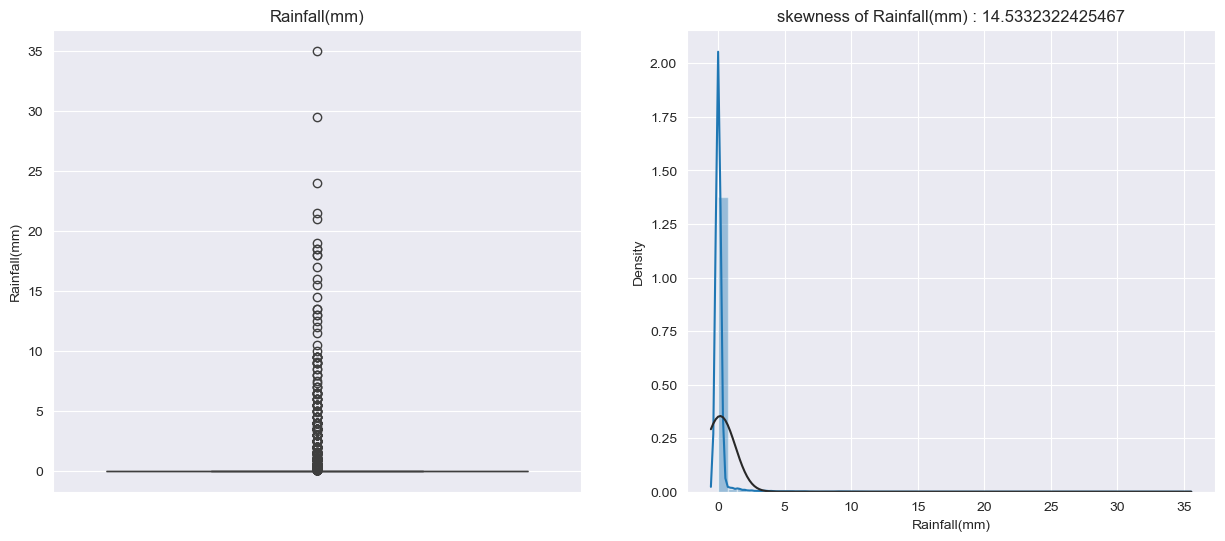

____________________________________________________________________________________________________


In [14]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot 
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [15]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var=['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


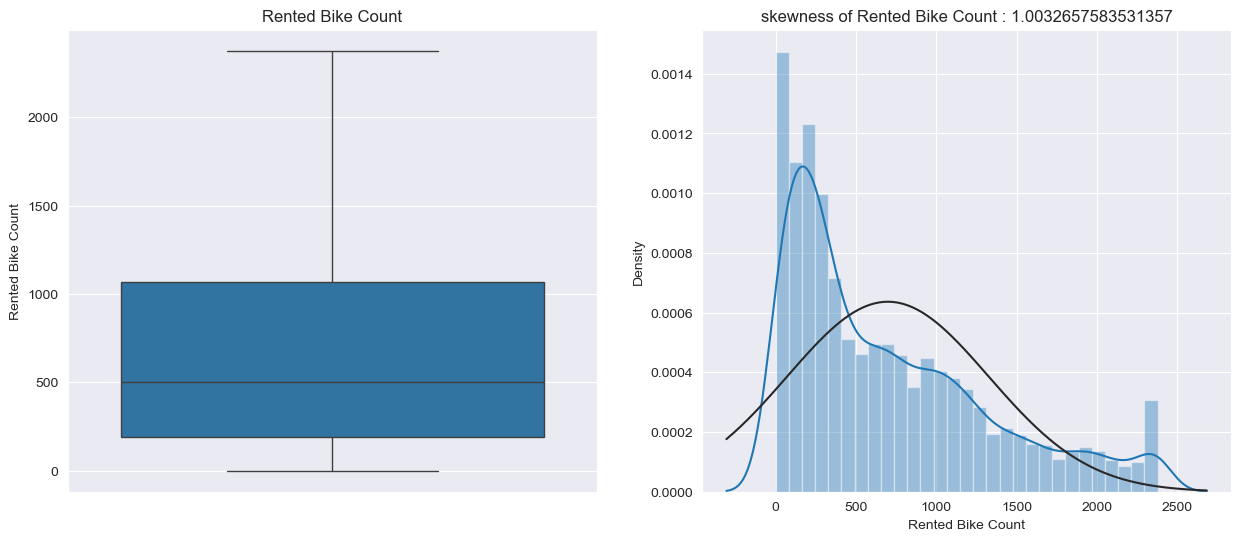

____________________________________________________________________________________________________


____________________________________________________________________________________________________


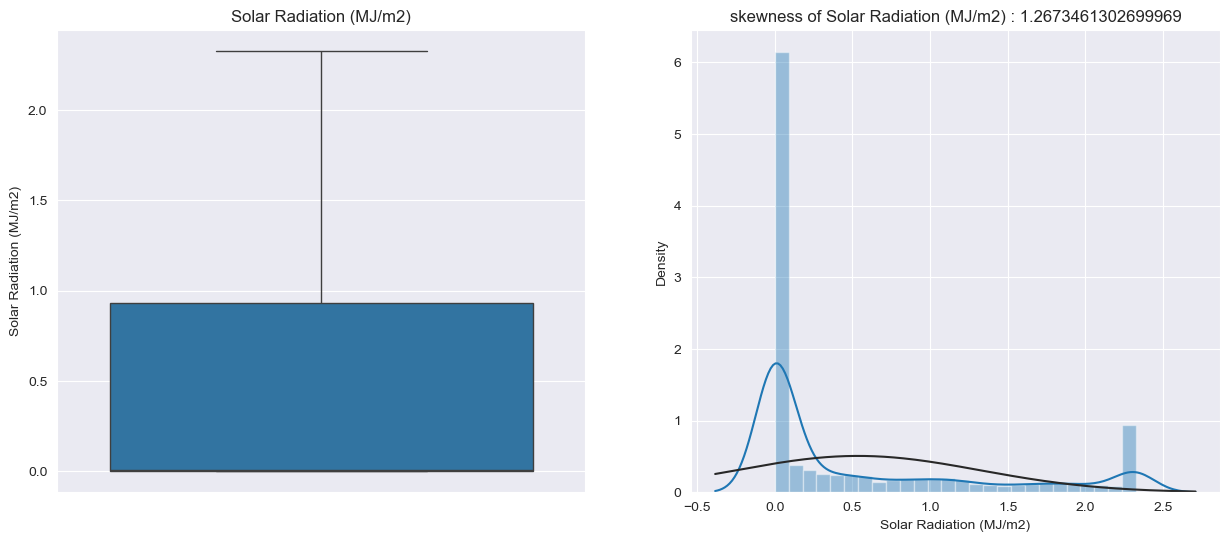

In [16]:
# Checking outliers for after removing it

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [17]:
# Final Basic description of dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          698.789812    11.500000        12.882922    58.226256   
std           626.910124     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          2376.625000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.715993       1436.825799                   4.073813   
std            1.008186        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            4.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.536235      0.148687       0.075068  
std                   0.785364      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   2.325000     35.000000       8.800000

## Data Wrangling and Feature Engineering

In [18]:
# Dataset
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017              254.0     0             -5.2           37   
1  01-12-2017              204.0     1             -5.5           38   
2  01-12-2017              173.0     2             -6.0           39   
3  01-12-2017              107.0     3             -6.2           40   
4  01-12-2017               78.0     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [19]:
# Checking unique values from each variable
for i in df.columns:
    print(f'{i} : {df[i].unique()}')
    print('--'*50)

Date : ['01-12-2017' '02-12-2017' '03-12-2017' '04-12-2017' '05-12-2017'
 '06-12-2017' '07-12-2017' '08-12-2017' '09-12-2017' '10-12-2017'
 '11-12-2017' '12-12-2017' '13-12-2017' '14-12-2017' '15-12-2017'
 '16-12-2017' '17-12-2017' '18-12-2017' '19-12-2017' '20-12-2017'
 '21-12-2017' '22-12-2017' '23-12-2017' '24-12-2017' '25-12-2017'
 '26-12-2017' '27-12-2017' '28-12-2017' '29-12-2017' '30-12-2017'
 '31-12-2017' '01-01-2018' '02-01-2018' '03-01-2018' '04-01-2018'
 '05-01-2018' '06-01-2018' '07-01-2018' '08-01-2018' '09-01-2018'
 '10-01-2018' '11-01-2018' '12-01-2018' '13-01-2018' '14-01-2018'
 '15-01-2018' '16-01-2018' '17-01-2018' '18-01-2018' '19-01-2018'
 '20-01-2018' '21-01-2018' '22-01-2018' '23-01-2018' '24-01-2018'
 '25-01-2018' '26-01-2018' '27-01-2018' '28-01-2018' '29-01-2018'
 '30-01-2018' '31-01-2018' '01-02-2018' '02-02-2018' '03-02-2018'
 '04-02-2018' '05-02-2018' '06-02-2018' '07-02-2018' '08-02-2018'
 '09-02-2018' '10-02-2018' '11-02-2018' '12-02-2018' '13-02-2018'
 '1

In [22]:
print(df.columns)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
    
    # Now extract date components
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

elif 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    
    # Now extract date components
    df['day'] = df['Date'].dt.day
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year

else:
    print("No date column found in the DataFrame")


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [23]:

if 'Date' in df.columns:
    df.drop(columns='Date', inplace=True)
else:
    print("Column 'Date' not found in the DataFrame")
    print(df.columns)

In [24]:
# Bsic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   int32

In [25]:
# Checking dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  year  
0     12  2017  
1     12  2017  
2     12  2017  
3     12  2017  
4     12  2017

## Exploratory data analysis

### Exploratory data analysis

In [26]:
# Obtaing target variable
excluded_variables=[var for var in df.columns if len(df[var].value_counts()) > 15]
target_variables=[var for var in df.columns if var not in excluded_variables]

# Defining r to autofit the number and size of plots
r = int(len(target_variables)/3 +1)

In [27]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

In [28]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

In [29]:
# Plotting graph of 'Hour' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.barplot(x="Hour", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Hour against Rented Bike Count')
plt.show()

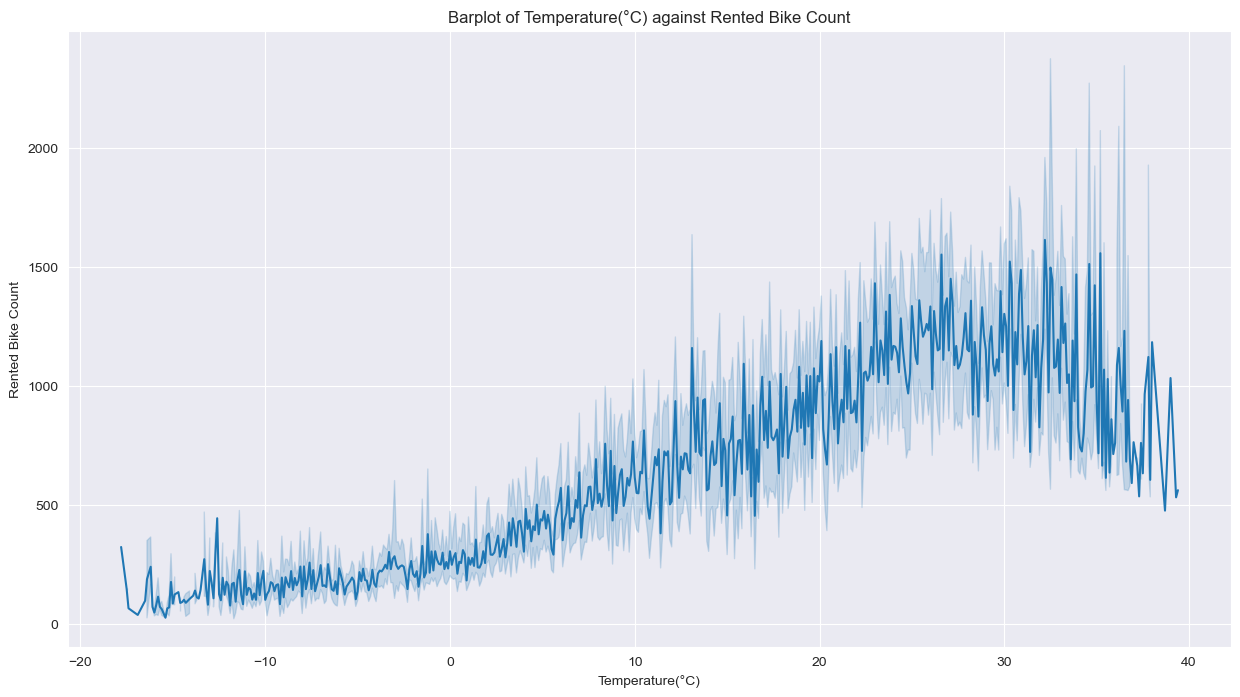

In [30]:
# Checking effect of temperature(°C) on rented bike use
plt.figure(figsize=(15,8))
ax=sns.lineplot(x="Temperature(°C)", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Temperature(°C) against Rented Bike Count')
plt.show()

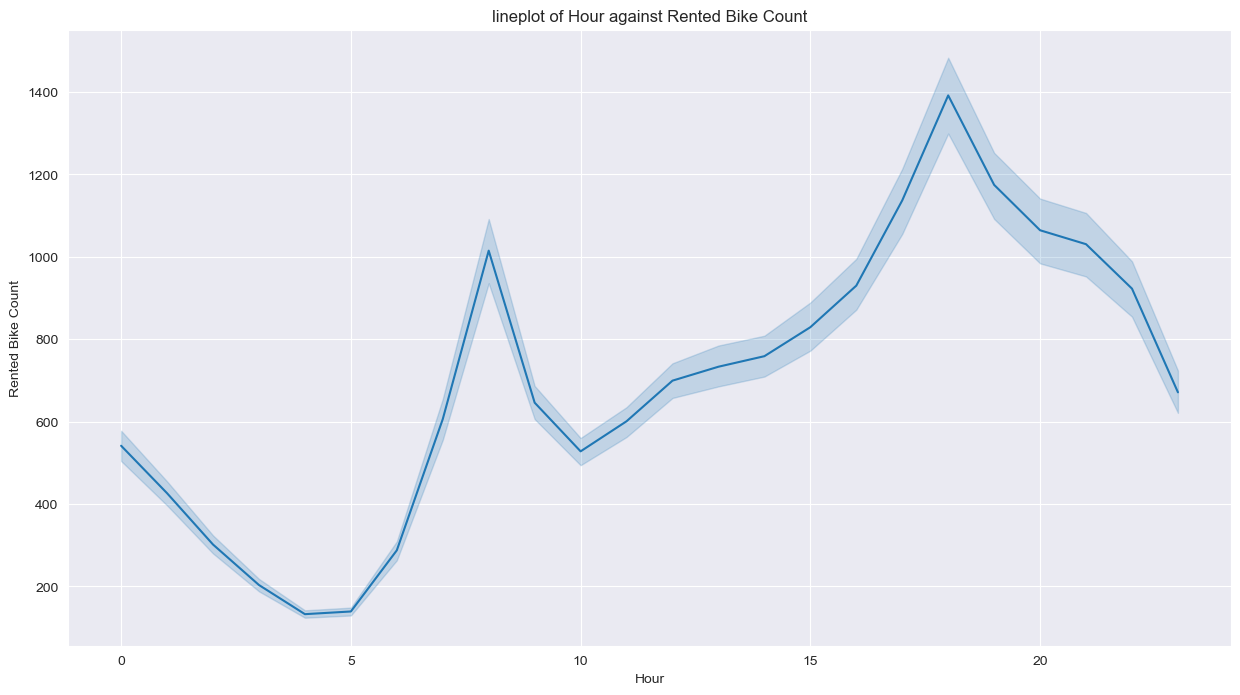

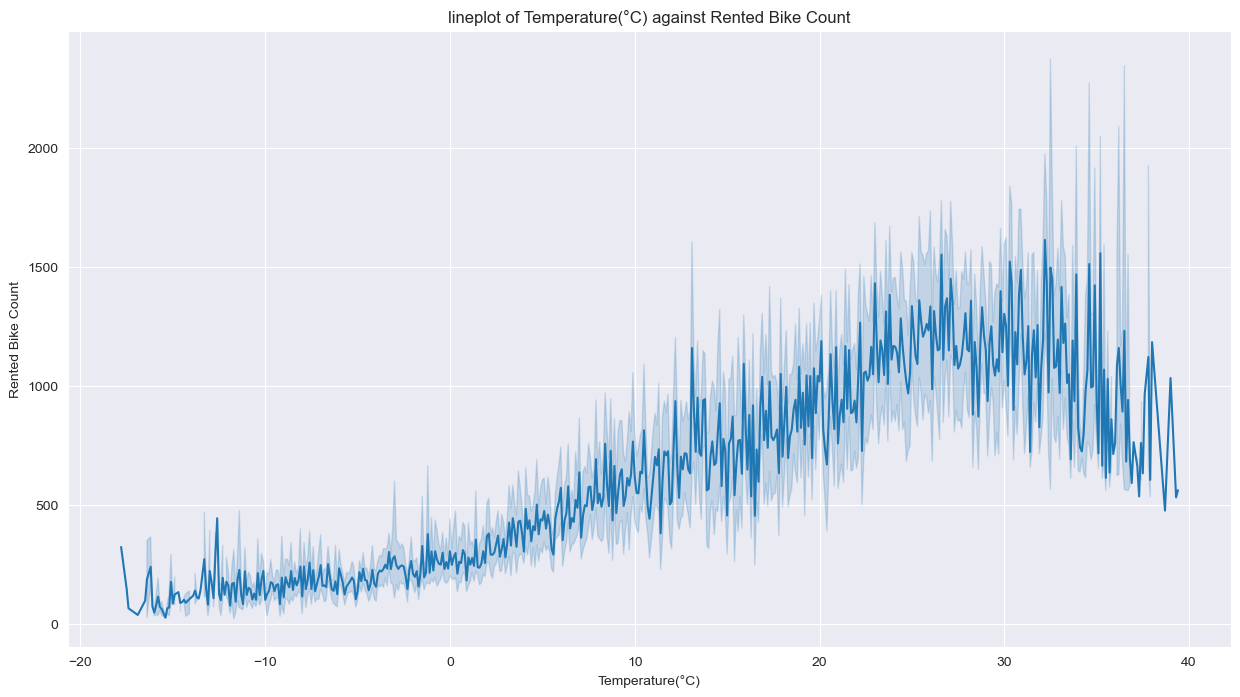

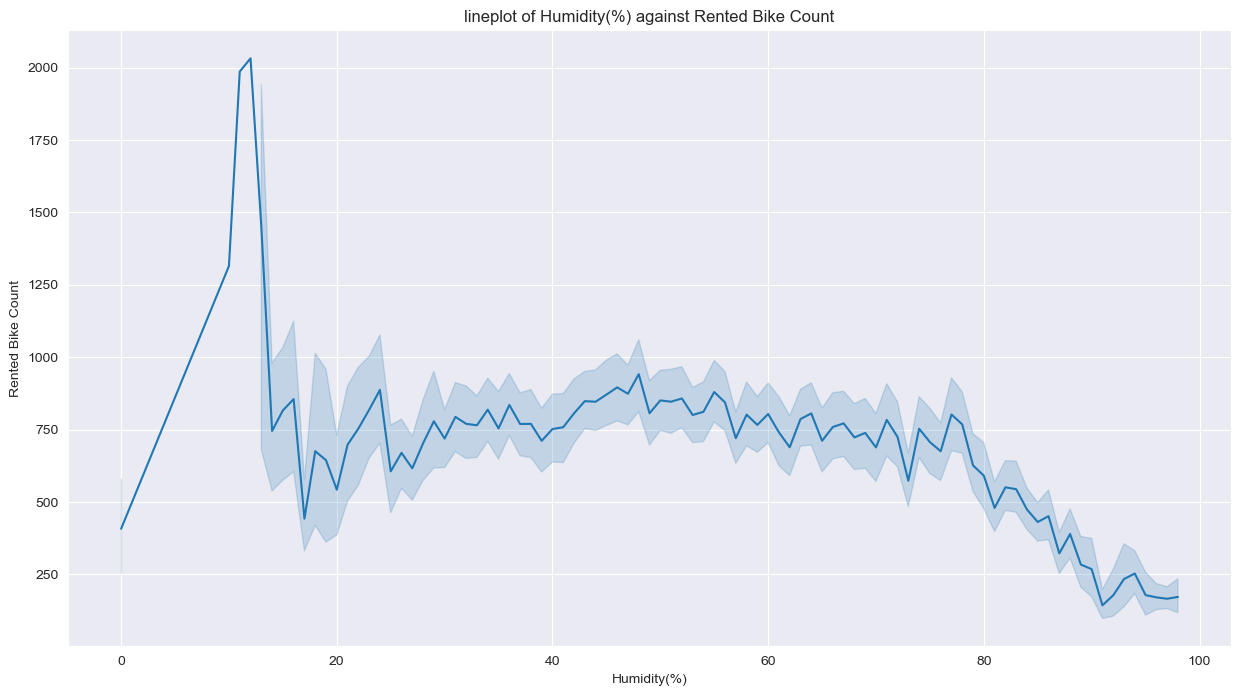

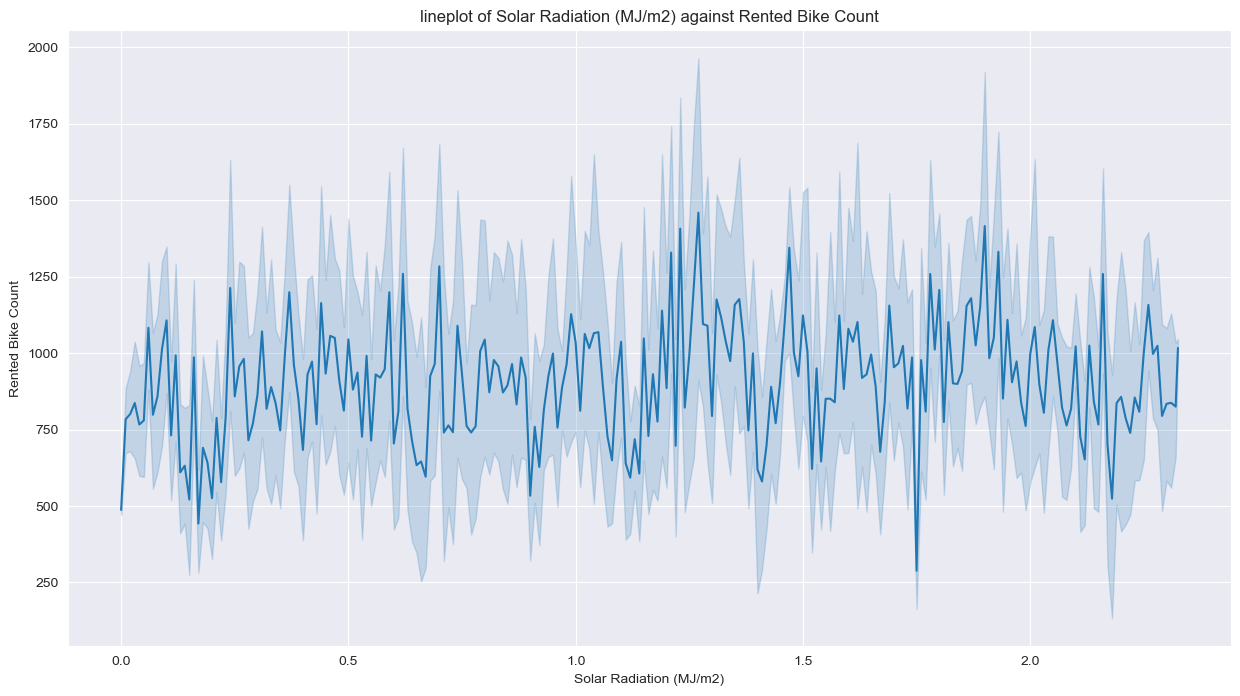

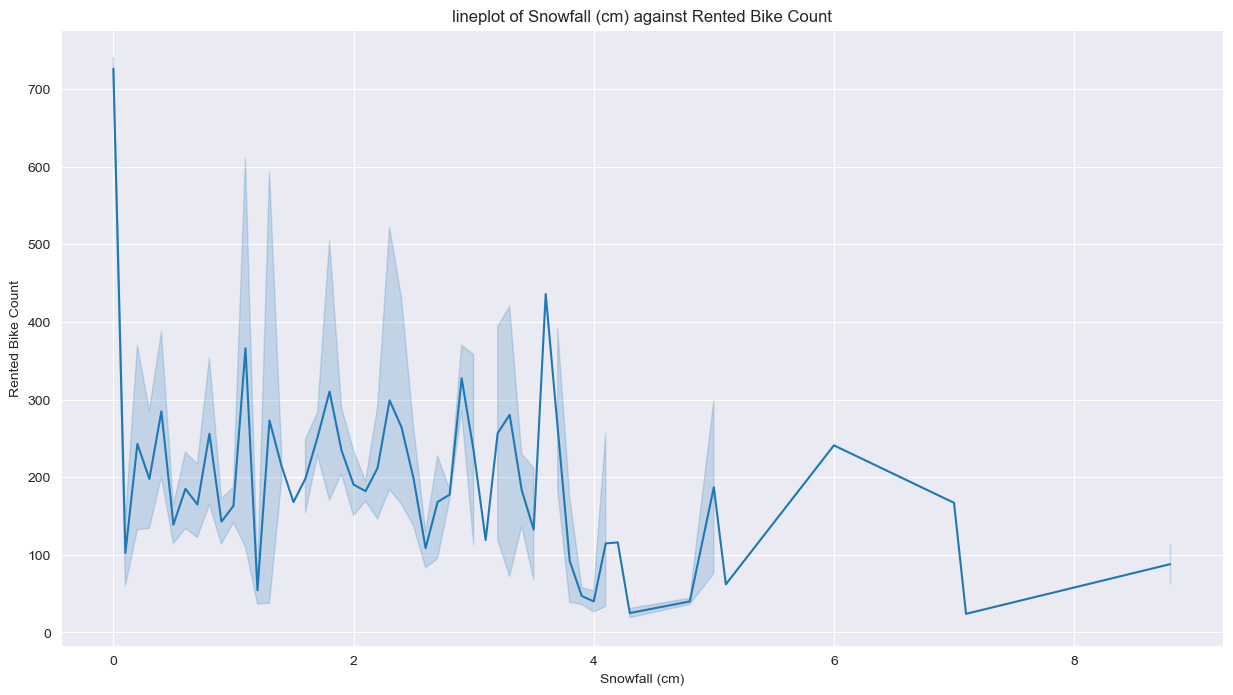

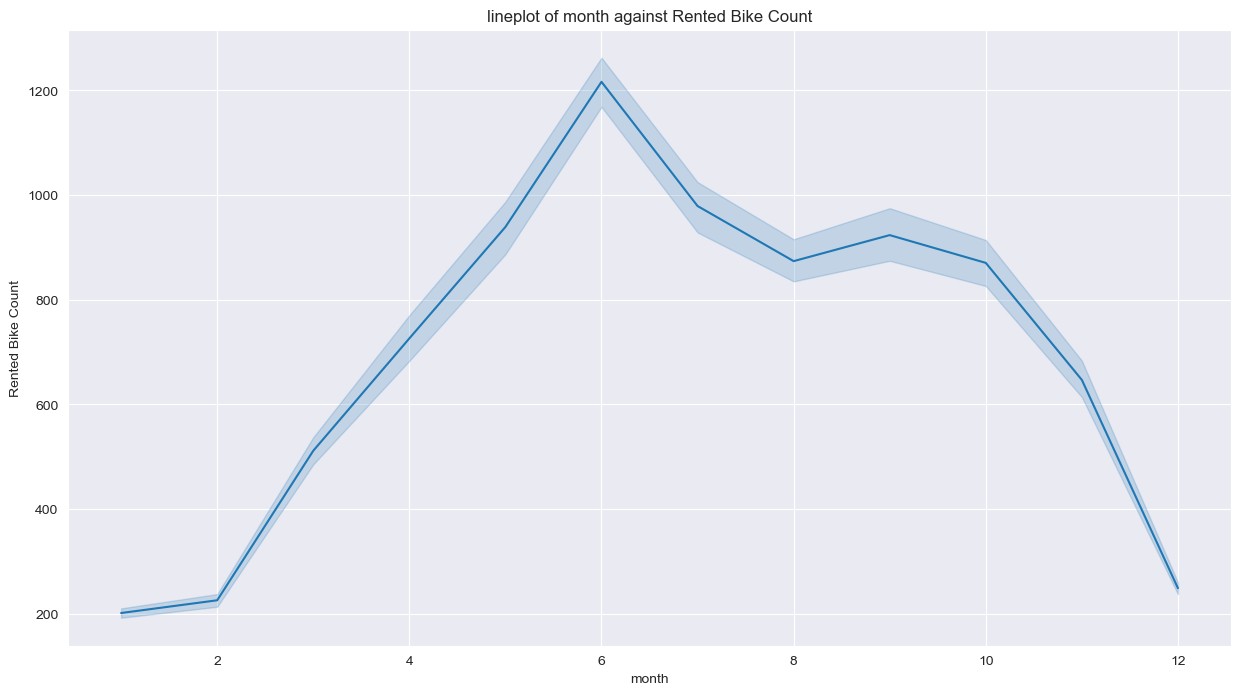

In [31]:
# Checking effect of each variable on use of rented bike
target_variables=[var for var in df.columns if var not in ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(15,8))
    ax=sns.lineplot(x=df[var], y=df["Rented Bike Count"],data=df)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

In [32]:
# Plotting graph of 'Visibility (10m)' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x="Visibility (10m)", y="Rented Bike Count",data=df)
ax.set_title('Visibility (10m) against Rented Bike Count')
plt.show()

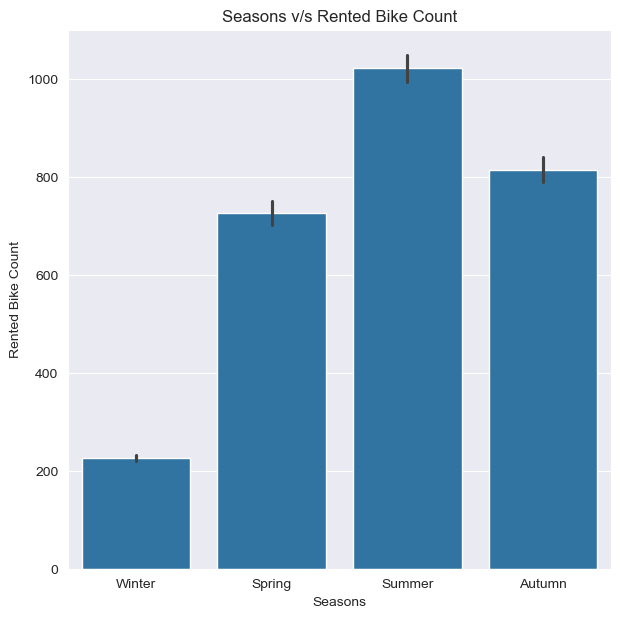

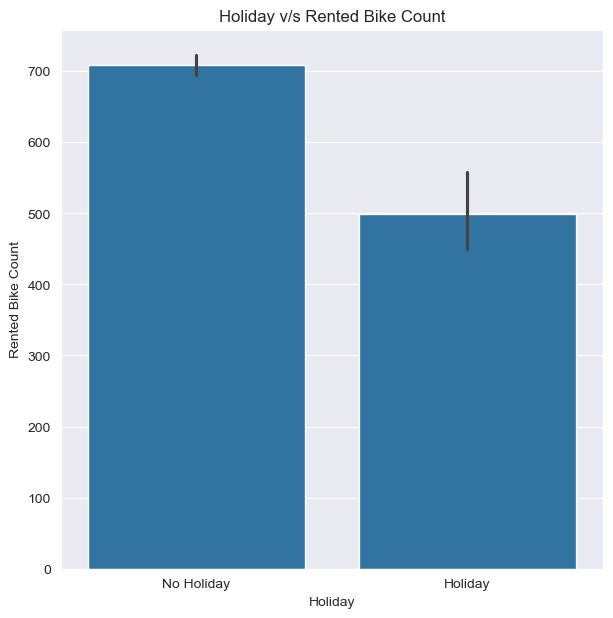

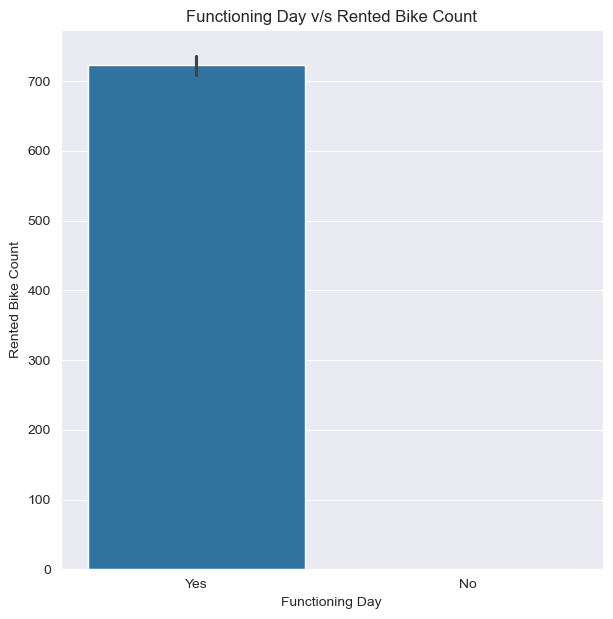

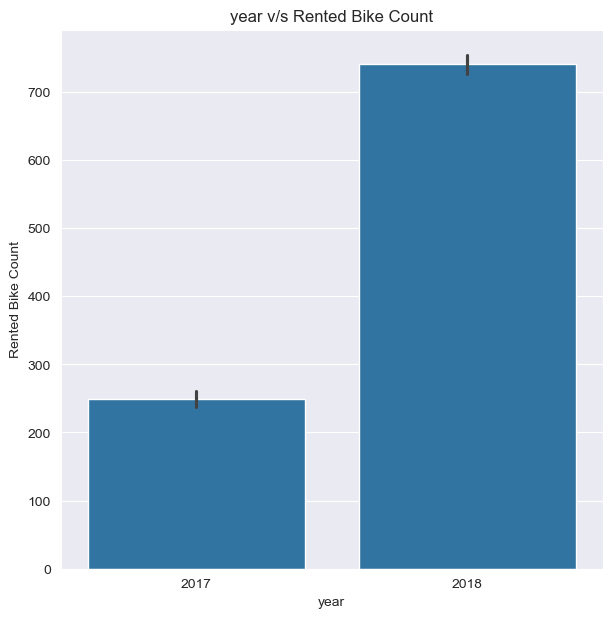

In [33]:
# Plotting bar plot for variables

# Defining target variables
target=[var for var in df.columns if var in ['Seasons', 'Holiday', 'Functioning Day', 'year']]

for var in target:
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=df[var], y='Rented Bike Count', data=df)
    ax.set_title(f'{var} v/s Rented Bike Count')
    plt.show()

## Data Pre-processing

### [1] Checking Distribution of each feature and transform it to normal distribution

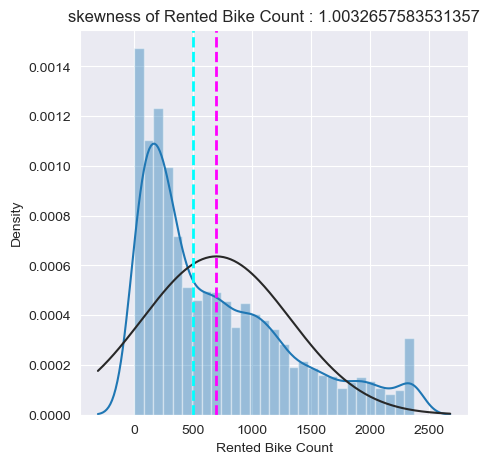

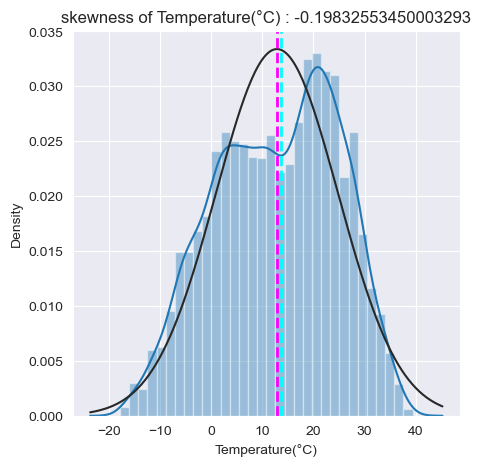

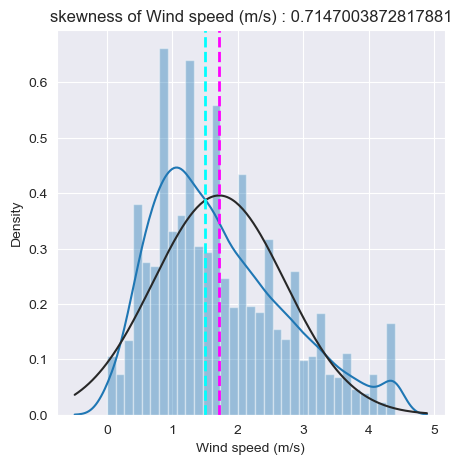

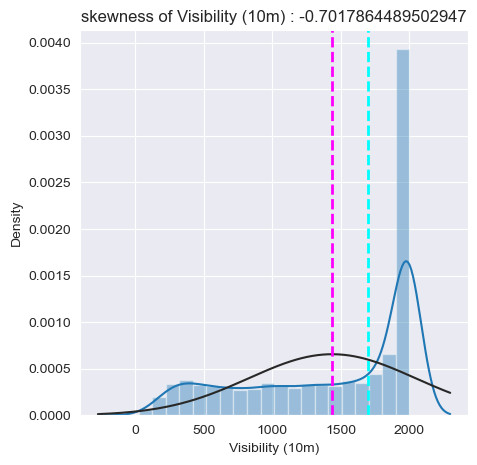

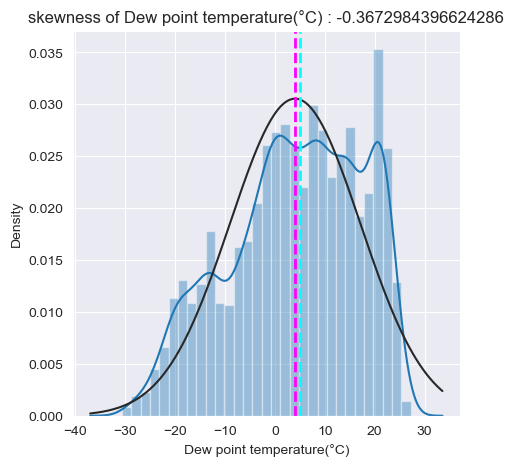

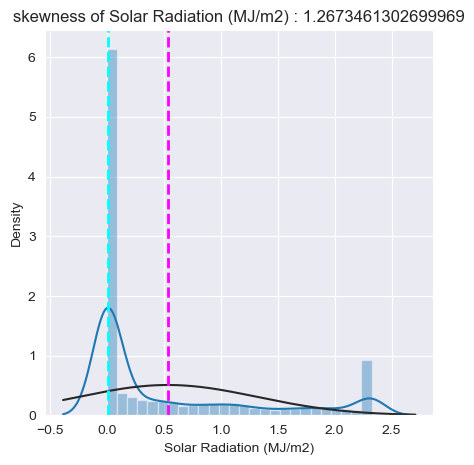

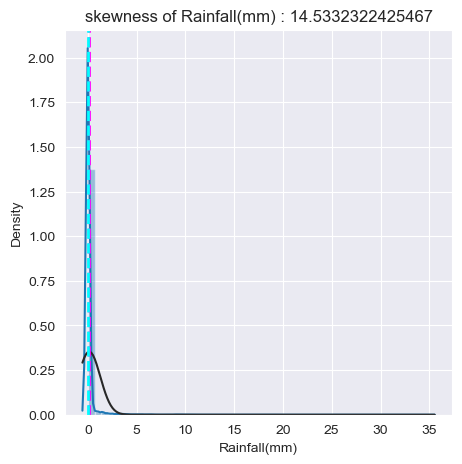

In [34]:
# Ckecking distribution of numerical feature
# Defining numerical contineous variables
num_variables=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Plotting distribution plot for each numerical variables
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

In [35]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["Rented Bike Count", "1.0032657583531357", 'Slightly'],
    ["Temperature(°C", "-0.19832553450003293", 'Nearly Symmetrical'],
    ["Humidity(%)", "0.05957897257708239",'Nearly Symmetrical'],
      ["Wind speed (m/s)", "0.7147003872817881",'Slightly'],
    ['Visibility (10m)','-0.7017864489502947','Slightly'],['Dew point temperature(°C)',' -0.3672984396624286', 'Nearly Symmetrical'],['Solar Radiation (MJ/m2)','1.2673461302699969', 'Slightly'],
    ['Rainfall(mm)','14.5332','Large'], ['Snowfall (cm)','8.440800781484777', 'Large']
]
 
# create header
head = ["Feature Name", "Skew", 'Skew-Type']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------------------+-----------+--------------------+
| Feature Name              |      Skew | Skew-Type          |
+===========================+===========+====================+
| Rented Bike Count         |  1.00327  | Slightly           |
+---------------------------+-----------+--------------------+
| Temperature(°C            | -0.198326 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Humidity(%)               |  0.059579 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Wind speed (m/s)          |  0.7147   | Slightly           |
+---------------------------+-----------+--------------------+
| Visibility (10m)          | -0.701786 | Slightly           |
+---------------------------+-----------+--------------------+
| Dew point temperature(°C) | -0.367298 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Solar Radiation (MJ/m2)   |  1.26735  | Slightly     

In [36]:
# Transforming distribution to normal using different transformations

# For positively skewed data
df['Rented Bike Count']=(df['Rented Bike Count']+1).transform(np.sqrt)
df['Wind speed (m/s)']=(df['Wind speed (m/s)']+1).transform(np.log)
df['Solar Radiation (MJ/m2)']=(df['Solar Radiation (MJ/m2)']+1).transform(np.log)

# For negatively skewed data
df['Visibility (10m)']=(max(df['Visibility (10m)']+1)-df['Visibility (10m)']).transform(np.sqrt)

# For large skewed data
df['Rainfall(mm)']=(df['Rainfall(mm)']+1).transform(np.log)
df['Snowfall (cm)']=(df['Snowfall (cm)']+1).transform(np.log)

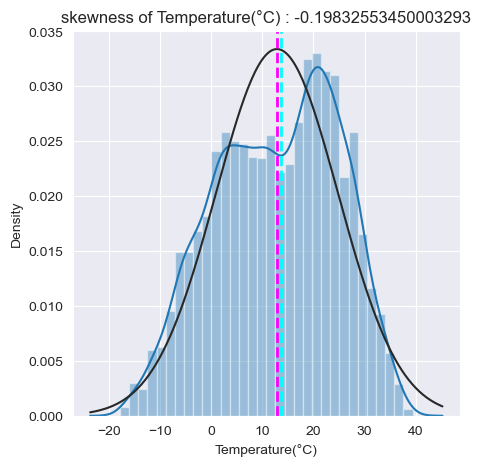

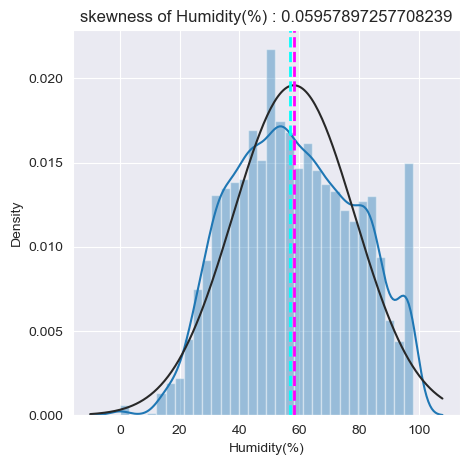

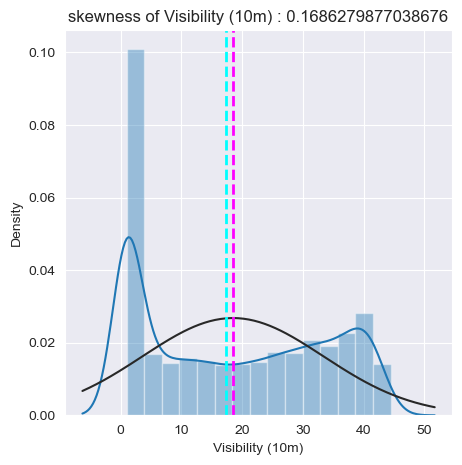

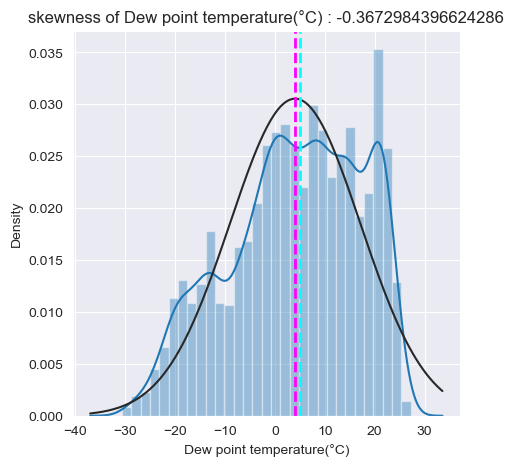

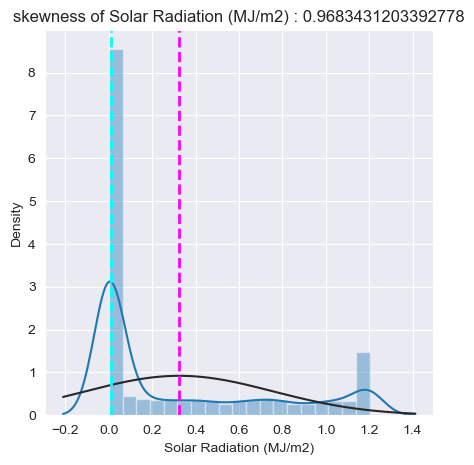

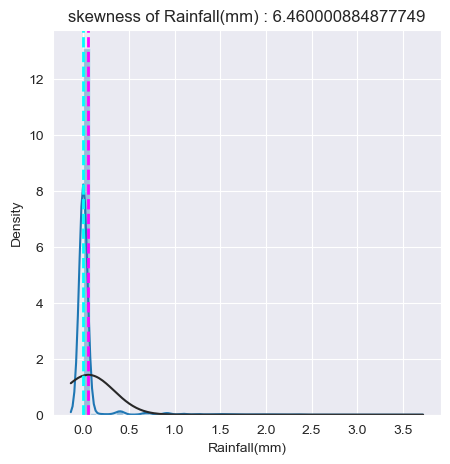

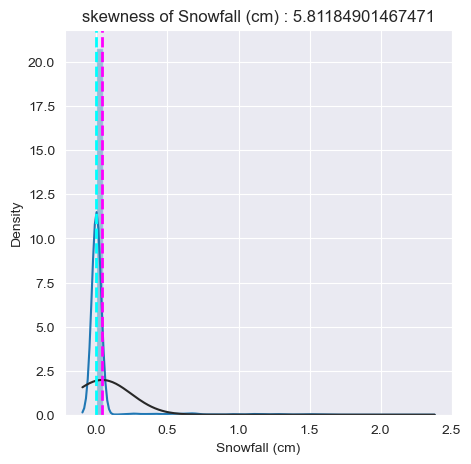

In [37]:
# Checking distribution after transformed data to normal distribution
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

### [2] Checking relationship between independent and dependent variables is linear

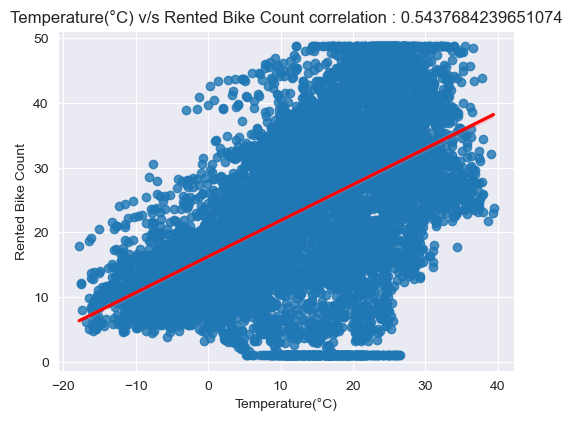

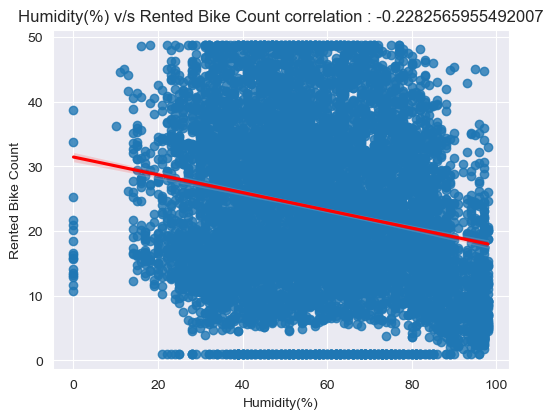

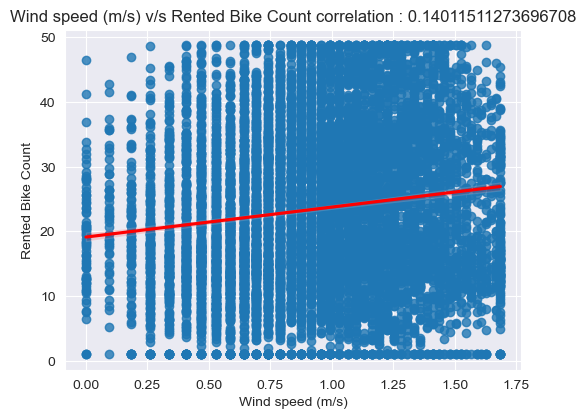

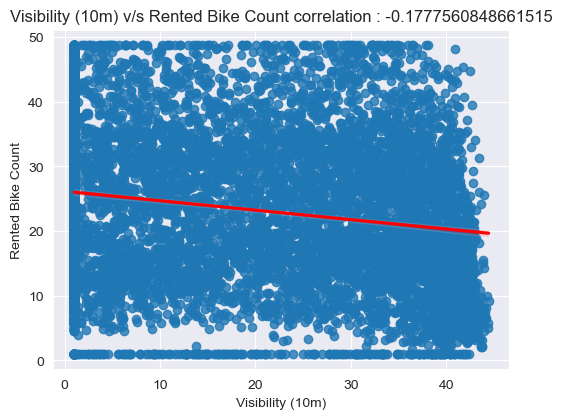

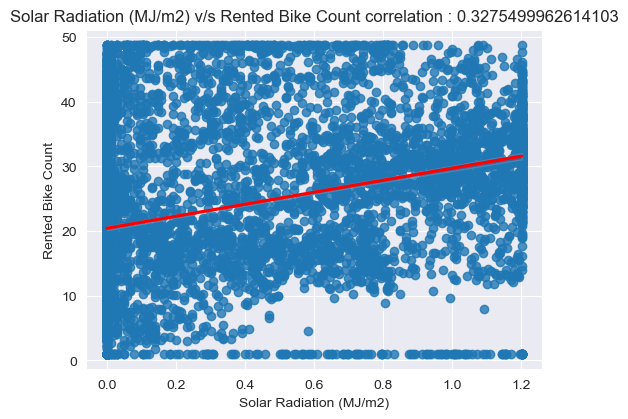

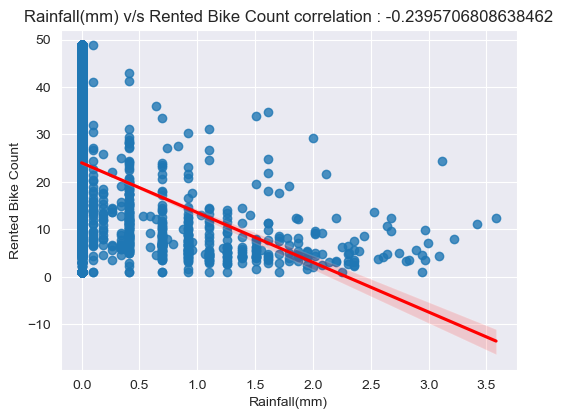

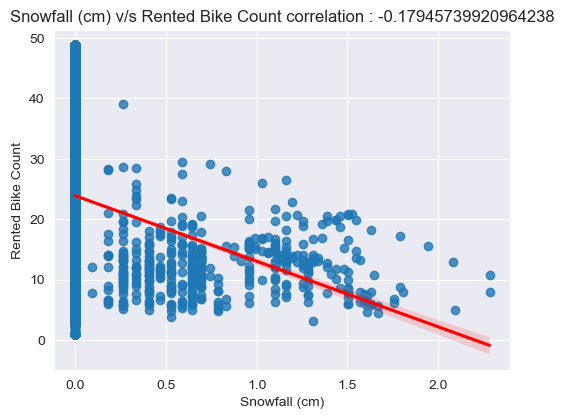

In [38]:
# Plotting regression plot 
for n, var in enumerate([var for var in num_variables if var not in ['Rented Bike Count']]):
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,n+1)
    # Finding correlation of independant variables with dependant variable
    dependant_var=df['Rented Bike Count']
    independant_var=df[var]
    correlation=independant_var.corr(dependant_var)
    ax=sns.regplot(x=df[var], y=df['Rented Bike Count'], data=df, line_kws={"color": "red"})
    ax.set_title(f'{var} v/s Rented Bike Count correlation : {correlation}')
    plt.show()

### [3] Checking multicollinearity in independant variables

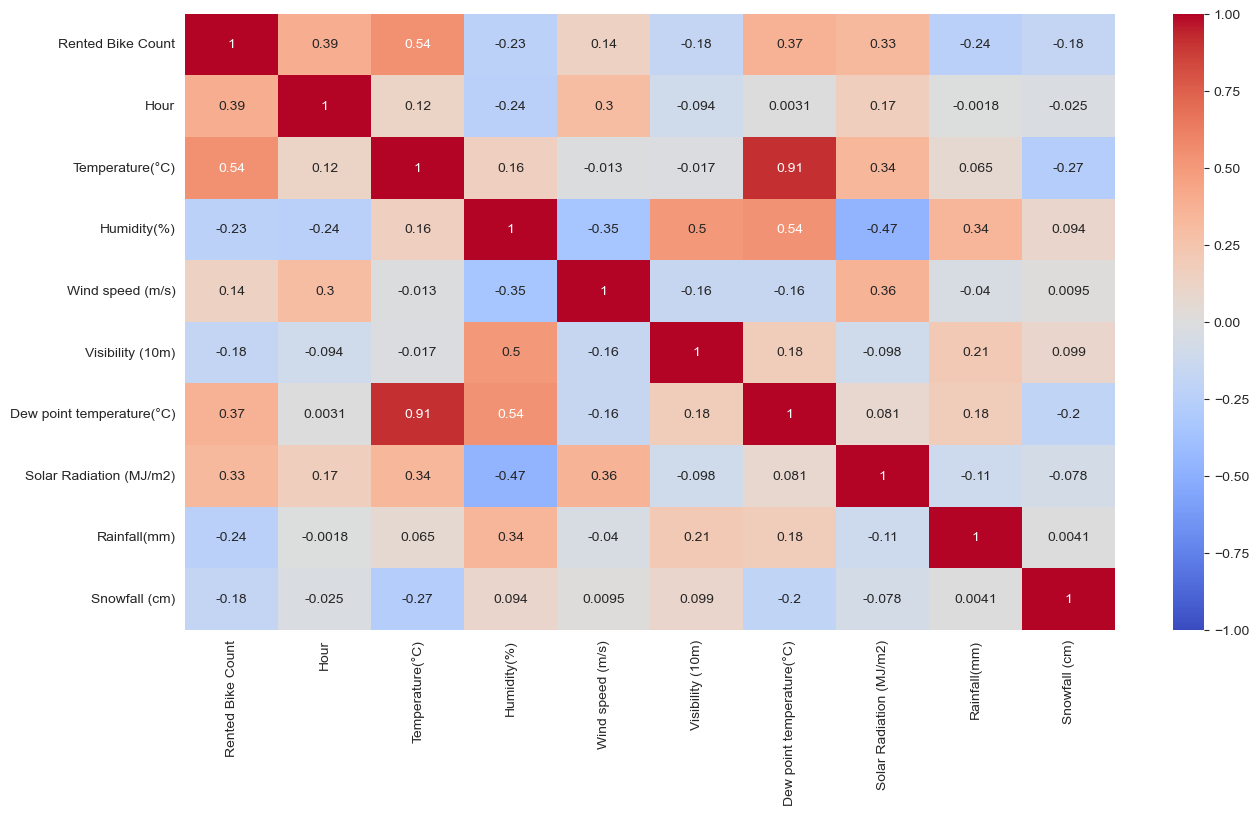

In [39]:
# Plotting a correlation heatmap for the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,8))
correlation = numeric_df.corr()
sns.heatmap(correlation, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [40]:
# Variance inflation factor(VIF) to detects multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [41]:
# Calculating Variance inflation factor for dataset
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0                        Hour    4.458189
1             Temperature(°C)  187.398377
2                 Humidity(%)  188.980829
3            Wind speed (m/s)    9.776335
4            Visibility (10m)    3.928065
5   Dew point temperature(°C)  126.449329
6     Solar Radiation (MJ/m2)    3.247160
7                Rainfall(mm)    1.238013
8               Snowfall (cm)    1.201201
9                         day    4.357153
10                      month    5.139632
11                       year  371.089228

In [42]:
# Dropping year feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year']]])

variables        VIF
0                        Hour   4.441471
1             Temperature(°C)  26.522858
2                 Humidity(%)  13.708619
3            Wind speed (m/s)   9.623113
4            Visibility (10m)   3.905894
5   Dew point temperature(°C)  13.301723
6     Solar Radiation (MJ/m2)   3.226481
7                Rainfall(mm)   1.172258
8               Snowfall (cm)   1.188108
9                         day   4.311702
10                      month   5.090815

In [43]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)']]])

variables        VIF
0                     Hour   4.083679
1          Temperature(°C)   3.466216
2              Humidity(%)  12.811837
3         Wind speed (m/s)   7.555983
4         Visibility (10m)   3.866969
5  Solar Radiation (MJ/m2)   2.799413
6             Rainfall(mm)   1.147084
7            Snowfall (cm)   1.173493
8                      day   3.821403
9                    month   4.725804

In [44]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)', 'Humidity(%)']]])

variables       VIF
0                     Hour  4.076513
1          Temperature(°C)  2.878029
2         Wind speed (m/s)  6.151327
3         Visibility (10m)  2.375840
4  Solar Radiation (MJ/m2)  2.117239
5             Rainfall(mm)  1.113558
6            Snowfall (cm)  1.160271
7                      day  3.719688
8                    month  3.816465

In [45]:
# Drop high VIF variables from dataset
columns_to_drop = ['Dew point temperature(°C)', 'Humidity(%)']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns, inplace=True)

In [46]:
# Checking dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0          15.968719     0             -5.2          1.163151   
1          14.317821     1             -5.5          0.587787   
2          13.190906     2             -6.0          0.693147   
3          10.392305     3             -6.2          0.641854   
4           8.888194     4             -6.0          1.193922   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0               1.0                      0.0           0.0            0.0   
1               1.0                      0.0           0.0            0.0   
2               1.0                      0.0           0.0            0.0   
3               1.0                      0.0           0.0            0.0   
4               1.0                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  day  month  year  
0  Winter  No Holiday             Yes    1     12  2017  
1  Winter  No Holiday             Yes    1     12  2017  
2  Winter  No Holiday             Yes    1     12  2017  
3  Winter  No Holiday             Yes    1     12  2017  
4  Winter  No Holiday             Yes    1     12  2017

In [47]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
categorical_variables

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [48]:
# Checking categories in each categorical features
for var in categorical_variables:
    if var in df.columns:  # Check if the column exists in the DataFrame
        print(df[var].value_counts())
        print('--'*50)
    else:
        print(f"Column '{var}' not found in the DataFrame")
        print('--'*50)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


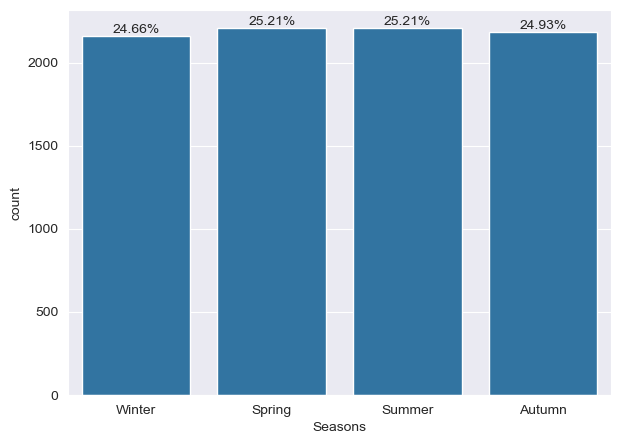

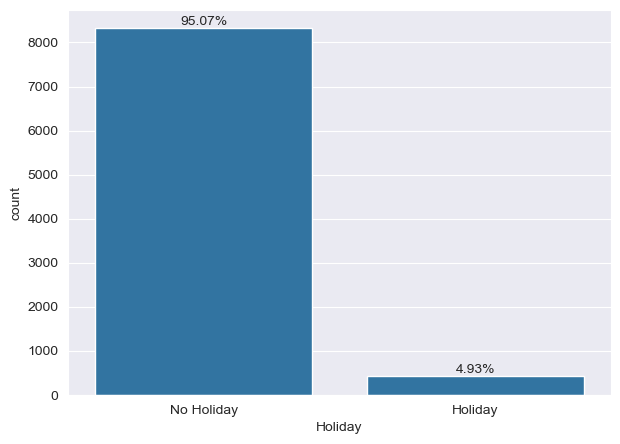

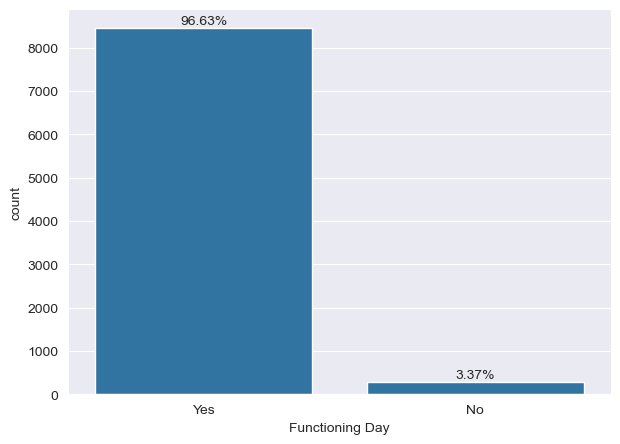

In [49]:
# Plotting count plot for each categories in categorical_variables
for var in categorical_variables:
    # Check if the column exists in the dataframe before trying to plot it
    if var in df.columns:
        plt.figure(figsize=(7,5))
        plot=plt.subplot(111)
        ax=sns.countplot(x=df[var])
        annot_percent(plot)
        plt.show()
    else:
        print(f"Column '{var}' not found in the dataframe. Skipping this variable.")

In [50]:
# Encoding categorical_variables using label encoding
# Mapping the categorical variables
df['Seasons'] = df['Seasons'].map({'Spring':1,'Summer':2,'Autumn':3,'Winter':4})
df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1,'No':0})

In [51]:
# Checking basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   float64
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Seasons                  8760 non-null   int64  
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  day                      8760 non-null   int32  
 12  month                    8760 non-null   int32  
 13  year                     8760 non-null   int32  
dtypes: float64(7), int32(3),

In [52]:
# Final Dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0          15.968719     0             -5.2          1.163151   
1          14.317821     1             -5.5          0.587787   
2          13.190906     2             -6.0          0.693147   
3          10.392305     3             -6.2          0.641854   
4           8.888194     4             -6.0          1.193922   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0               1.0                      0.0           0.0            0.0   
1               1.0                      0.0           0.0            0.0   
2               1.0                      0.0           0.0            0.0   
3               1.0                      0.0           0.0            0.0   
4               1.0                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  day  month  year  
0        4        0                1    1     12  2017  
1        4        0                1    1     12  2017  
2        4        0                1    1     12  2017  
3        4        0                1    1     12  2017  
4        4        0                1    1     12  2017

## [5] Data Splitting

In [53]:
# Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Rented Bike Count'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].values
# Create the data of dependent variable
y = df[dependent_variable].values

In [54]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (7008, 13)
Shape of X_test : (1752, 13)
Shape of y_train : (7008,)
Shape of y_test : (1752,)


In [56]:
# Checking values of splitted dataset
X_train[0:5]

array([[ 2.01800000e+03,  3.58050276e+01,  0.00000000e+00,
         1.50000000e+01,  7.08035793e-01,  0.00000000e+00,
         1.10000000e+01,  1.58923521e+00,  1.60000000e+01,
         1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         1.32000000e+01],
       [ 2.01800000e+03,  3.82491830e+01,  0.00000000e+00,
         9.00000000e+00,  5.65313809e-01,  0.00000000e+00,
         6.00000000e+00,  9.93251773e-01,  2.90000000e+01,
         1.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         2.29000000e+01],
       [ 2.01800000e+03,  3.36452077e+01,  0.00000000e+00,
         1.90000000e+01,  0.00000000e+00,  0.00000000e+00,
         1.10000000e+01,  8.75468737e-01,  1.50000000e+01,
         1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         1.12000000e+01],
       [ 2.01800000e+03,  2.38117618e+01,  0.00000000e+00,
         2.30000000e+01,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  1.09861229e+00,  2.00000000e+00,
         1.00000000e+00,  0.00000000e

In [57]:
# Checking values of splitted dataset
X_test[0:5]

array([[2.01800000e+03, 1.41421356e+00, 0.00000000e+00, 8.00000000e+00,
        5.30628251e-01, 0.00000000e+00, 8.00000000e+00, 1.02961942e+00,
        1.00000000e+01, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.72000000e+01],
       [2.01800000e+03, 3.46554469e+01, 0.00000000e+00, 1.20000000e+01,
        1.20146967e+00, 0.00000000e+00, 7.00000000e+00, 1.13140211e+00,
        2.00000000e+01, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        3.26000000e+01],
       [2.01800000e+03, 1.60312195e+01, 0.00000000e+00, 1.40000000e+01,
        9.85816795e-01, 0.00000000e+00, 8.00000000e+00, 7.88457360e-01,
        7.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        3.40000000e+01],
       [2.01800000e+03, 1.90787840e+01, 0.00000000e+00, 1.80000000e+01,
        1.04360015e-01, 0.00000000e+00, 1.00000000e+01, 8.75468737e-01,
        1.60000000e+01, 1.00000000e+00, 0.00000000e+00, 3.00000000e+00,
        1.69000000e+01],
       [2.01800000e+03, 2.45560583e+

### [6] Data Scaling

In [58]:
#Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[1.        , 0.80265925, 0.        , 0.65217391, 0.58930809,
        0.        , 0.90909091, 0.94238389, 0.5       , 1.        ,
        0.        , 0.66666667, 0.54195804],
       [1.        , 0.85902536, 0.        , 0.39130435, 0.47051858,
        0.        , 0.45454545, 0.58897793, 0.93333333, 1.        ,
        0.        , 0.33333333, 0.71153846],
       [1.        , 0.75285037, 0.        , 0.82608696, 0.        ,
        0.        , 0.90909091, 0.51913501, 0.46666667, 1.        ,
        0.        , 0.66666667, 0.50699301],
       [1.        , 0.52607548, 0.        , 1.        , 0.        ,
        0.        , 0.09090909, 0.65145456, 0.03333333, 1.        ,
        0.        , 1.        , 0.26573427],
       [1.        , 0.70474989, 0.        , 0.95652174, 0.        ,
        0.        , 0.54545455, 0.54334162, 0.56666667, 1.        ,
        0.        , 0.33333333, 0.78671329]])

In [60]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[1.        , 0.00955242, 0.        , 0.34782609, 0.44164931,
        0.        , 0.63636364, 0.6105432 , 0.3       , 1.        ,
        0.        , 0.33333333, 0.78671329],
       [1.        , 0.77614809, 0.        , 0.52173913, 1.        ,
        0.        , 0.54545455, 0.67089825, 0.63333333, 1.        ,
        0.        , 0.33333333, 0.88111888],
       [1.        , 0.34664381, 0.        , 0.60869565, 0.82050909,
        0.        , 0.63636364, 0.46753905, 0.2       , 1.        ,
        0.        , 0.33333333, 0.90559441],
       [1.        , 0.41692549, 0.        , 0.7826087 , 0.0868603 ,
        0.        , 0.81818182, 0.51913501, 0.5       , 1.        ,
        0.        , 0.66666667, 0.60664336],
       [1.        , 0.54324014, 0.        , 0.30434783, 0.14478377,
        0.        , 0.27272727, 0.41102207, 0.56666667, 1.        ,
        0.        , 0.        , 0.42307692]])

## ML Model Implementation

In [61]:
# Definig function for evaluating model

# Importing necessary librery
from sklearn import metrics
#Evaluate Metrics
def evaluate_model(true, predicted):  
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('Mean squared error (MSE):', mse)
    print('Root mean squared error (RMSE):', rmse)
    print('Mean absolute error (MAE):', mae)
    print('R2 Square', r2_square)
    print('____________________________________')

## [1] Linear Regression

### [1.1] train_test_split

In [62]:
# Fitting Regression model to training set
from sklearn.linear_model import LinearRegression
lin_reg_tts = LinearRegression()
lin_reg_tts.fit(X_train, y_train)

LinearRegression()

In [63]:
# Score of the model
lin_reg_tts_score=lin_reg_tts.score(X_train, y_train)
print(f'Score of the model : {lin_reg_tts_score}')

Score of the model : 0.6572533325324464


In [64]:
# Intercept
lin_reg_tts.intercept_

-28.509843892761346

In [65]:
# Coefficients
lin_reg_tts.coef_

array([  6.78017656,  -2.80204285, -40.14488778,  13.19353507,
         2.94258505,  -3.95881967,   8.55406733,   1.14896547,
         0.55266913,  27.1140165 ,  -2.88611461,  -3.3894716 ,
        19.70061535])

In [66]:
# Predicting results for train and test set
y_train_pred_tts=lin_reg_tts.predict(X_train)
y_test_pred_tts=lin_reg_tts.predict(X_test)

In [67]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 51.48485350004767
Root mean squared error (RMSE): 7.175294662942259
Mean absolute error (MAE): 5.560321719294736
R2 Square 0.6572533325324464
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 53.29525005931666
Root mean squared error (RMSE): 7.300359584247659
Mean absolute error (MAE): 5.582904238013807
R2 Square 0.6420394698275059
____________________________________


In [68]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6566162569423581
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6393619744924988


In [69]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.21078178340436954


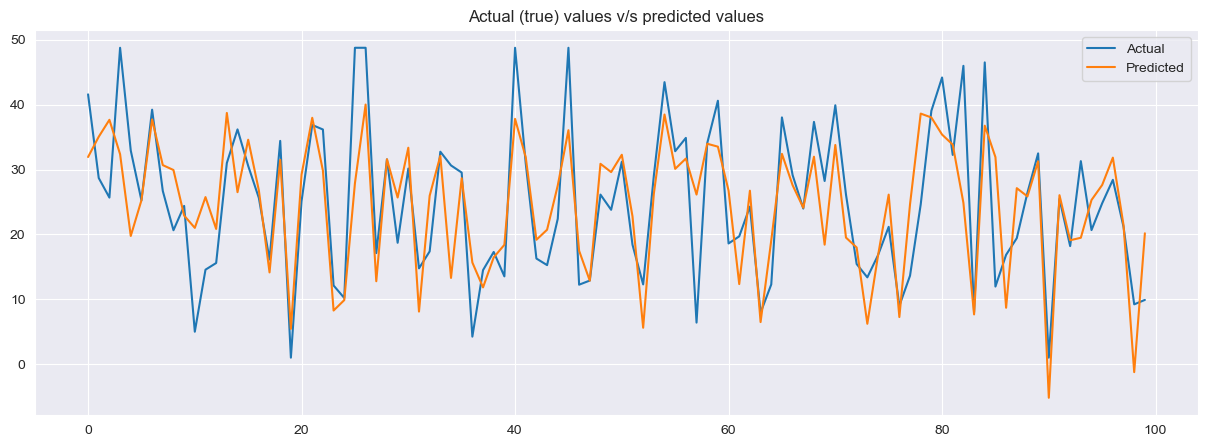

In [70]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

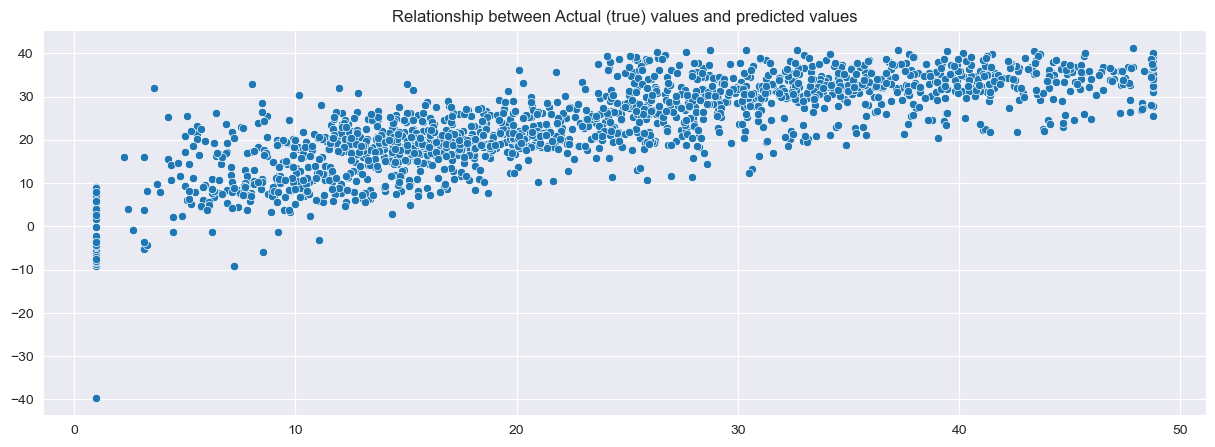

In [71]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## [2] Lasso Regression (L1)

### Cross Validation

In [72]:
# Fitting lasso regression model to training set
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001 , max_iter= 3000, random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_reg = GridSearchCV(lasso, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000, random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [73]:
# Best estimators
lasso_reg_best_est=lasso_reg.best_estimator_
print(f'The best estimator values : {lasso_reg_best_est}')

The best estimator values : Lasso(alpha=0.0014, max_iter=3000, random_state=0)


In [74]:
# best fit alpha value
lasso_reg_best_params=lasso_reg.best_params_
print(f'The best fit alpha value : {lasso_reg_best_params}')

The best fit alpha value : {'alpha': 0.0014}


In [75]:
# Mean cross-validated score of the best_estimator of model
lasso_reg_score=lasso_reg.best_score_
print(f" The negative mean squared error is: {lasso_reg_score}")

 The negative mean squared error is: -51.73626337186122


In [76]:
# Predicting results for train and test set
y_train_pred=lasso_reg.predict(X_train)
y_test_pred=lasso_reg.predict(X_test)

In [77]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 51.485715389211904
Root mean squared error (RMSE): 7.175354722187044
Mean absolute error (MAE): 5.560837561672866
R2 Square 0.6572475947354307
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 53.285904609362085
Root mean squared error (RMSE): 7.2997194884024195
Mean absolute error (MAE): 5.5830080406256535
R2 Square 0.6421022390652282
____________________________________


In [78]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6566105084802921
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6394252132354514


In [79]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.21091516958910003


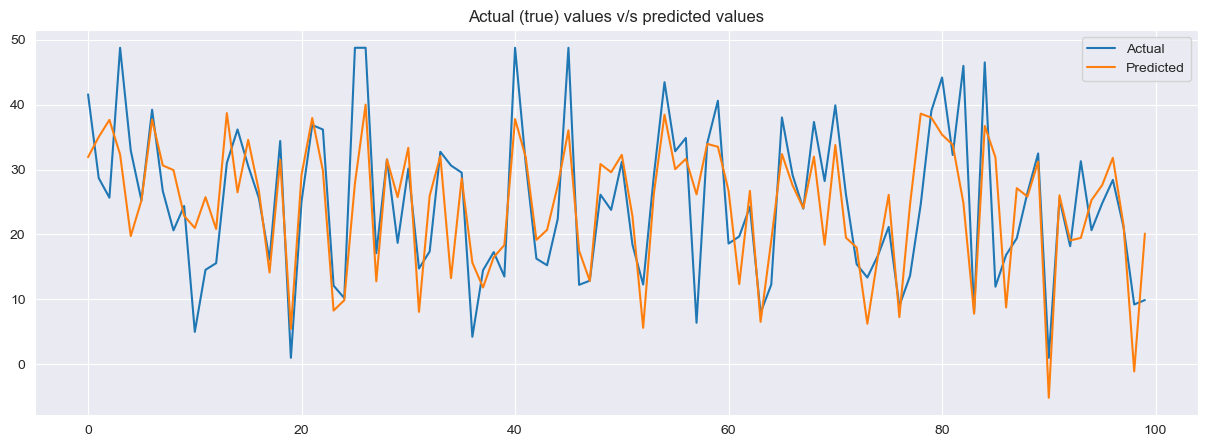

In [80]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

In [81]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## [3] Ridge Regression (L2)

### Cross Validation

In [82]:
# Fitting ridge regression model to training set
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_reg = GridSearchCV(ridge, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [83]:
# Best estimators
ridge_reg_best_est=ridge_reg.best_estimator_
print(f'The best estimator values : {ridge_reg_best_est}')

The best estimator values : Ridge(alpha=1, random_state=0)


In [84]:
# best fit alpha value
ridge_reg_best_params=ridge_reg.best_params_
print(f'The best fit alpha value : {ridge_reg_best_params}')

The best fit alpha value : {'alpha': 1}


In [85]:
# Mean cross-validated score of the best_estimator of model
ridge_reg_score=ridge_reg.best_score_
print(f" The negative mean squared error is: {ridge_reg_score}")

 The negative mean squared error is: -51.733909350736795


In [86]:
# Predicting results for train and test set
y_train_pred=ridge_reg.predict(X_train)
y_test_pred=ridge_reg.predict(X_test)

In [87]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 51.49153995720347
Root mean squared error (RMSE): 7.175760583882623
Mean absolute error (MAE): 5.562682465846029
R2 Square 0.6572088192289889
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 53.28605457694831
Root mean squared error (RMSE): 7.299729760542394
Mean absolute error (MAE): 5.584911700104568
R2 Square 0.6421012317995409
____________________________________


In [88]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6565716609004182
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.639424198435556


In [89]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.2106110236345578


In [90]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actal", "Predicted"])
plt.show()

In [91]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## [4] ElasticNet Regression

### Cross Validation

In [92]:
# Fitting elasticnet regression model to training set
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
enet_reg = GridSearchCV(elasticnet, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
enet_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
# Best estimators
enet_reg_best_est=enet_reg.best_estimator_
print(f'The best estimator values : {enet_reg_best_est}')

The best estimator values : ElasticNet(alpha=0.0001, random_state=0)


In [94]:
# best fit alpha value
enet_reg_best_params=enet_reg.best_params_
print(f'The best fit alpha value : {enet_reg_best_params}')

The best fit alpha value : {'alpha': 0.0001}


In [95]:
# Mean cross-validated score of the best_estimator of model
enet_reg_score=enet_reg.best_score_
print(f" The negative mean squared error is: {enet_reg_score}")

 The negative mean squared error is: -51.73426418565574


In [96]:
# Predicting results for train and test set
y_train_pred=enet_reg.predict(X_train)
y_test_pred=enet_reg.predict(X_test)

In [97]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 51.485746228896446
Root mean squared error (RMSE): 7.1753568711874145
Mean absolute error (MAE): 5.561131309848257
R2 Square 0.6572473894284641
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 53.28997428203511
Root mean squared error (RMSE): 7.299998238495343
Mean absolute error (MAE): 5.583556088798465
R2 Square 0.6420749048809239
____________________________________


In [98]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6566103027917141
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6393976745952231


In [99]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.2107267322938421


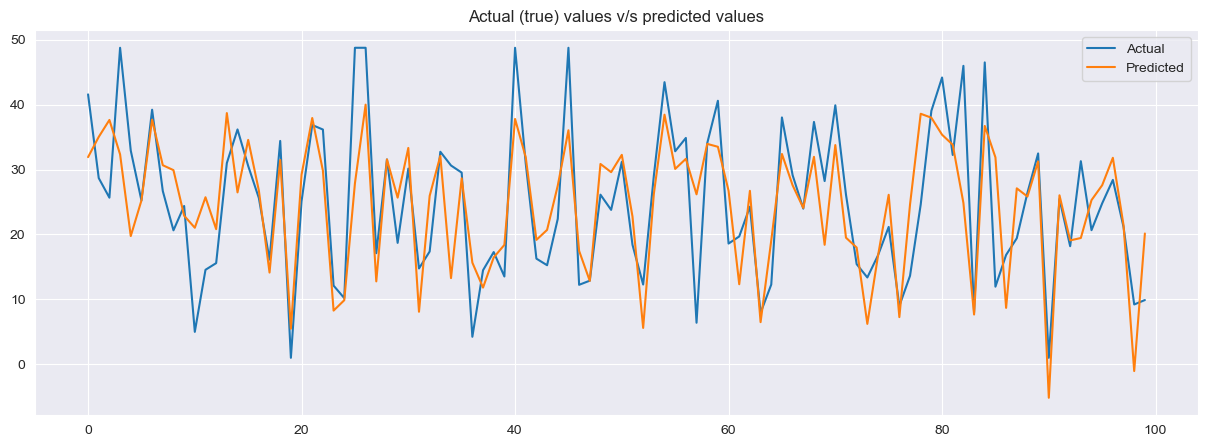

In [100]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

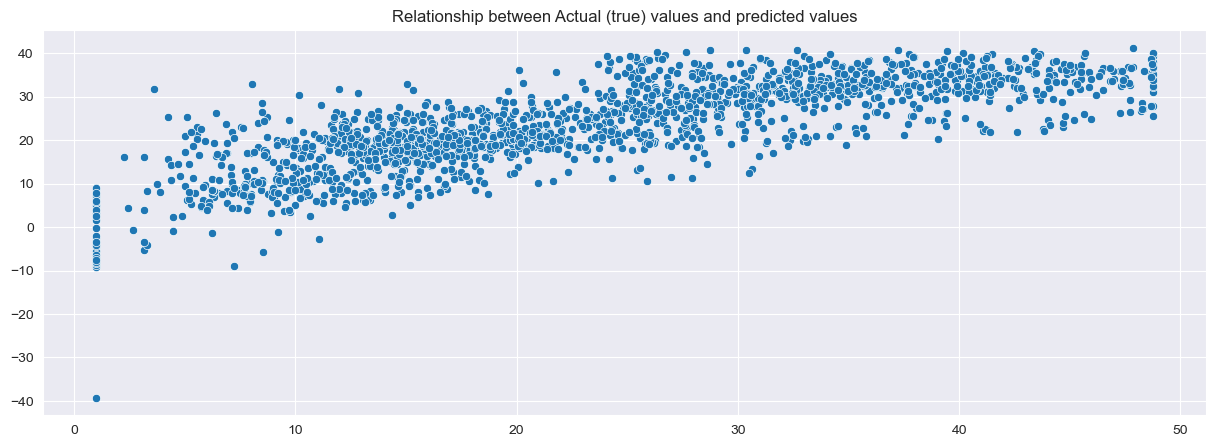

In [101]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## [5] Decision Tree

### train_test_split

In [102]:
# Fitting Decision tree Regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree_tts=DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
dtree_tts.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [103]:
# Score of the model
dtree_tts_score=dtree_tts.score(X_train, y_train)
print(f'Score of the model : {dtree_tts_score}')

Score of the model : 0.7217408060761781


In [104]:
# Predicting results for train and test set
y_train_pred_tts=dtree_tts.predict(X_train)
y_test_pred_tts=dtree_tts.predict(X_test)

In [105]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 41.79802517136224
Root mean squared error (RMSE): 6.465139222890891
Mean absolute error (MAE): 4.880238891112918
R2 Square 0.7217408060761781
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 42.74620140910454
Root mean squared error (RMSE): 6.538057923351899
Mean absolute error (MAE): 4.916573458097294
R2 Square 0.7128927455592566
____________________________________


In [106]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.7212235956785502
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7107452229426112


In [107]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.2473690186619161


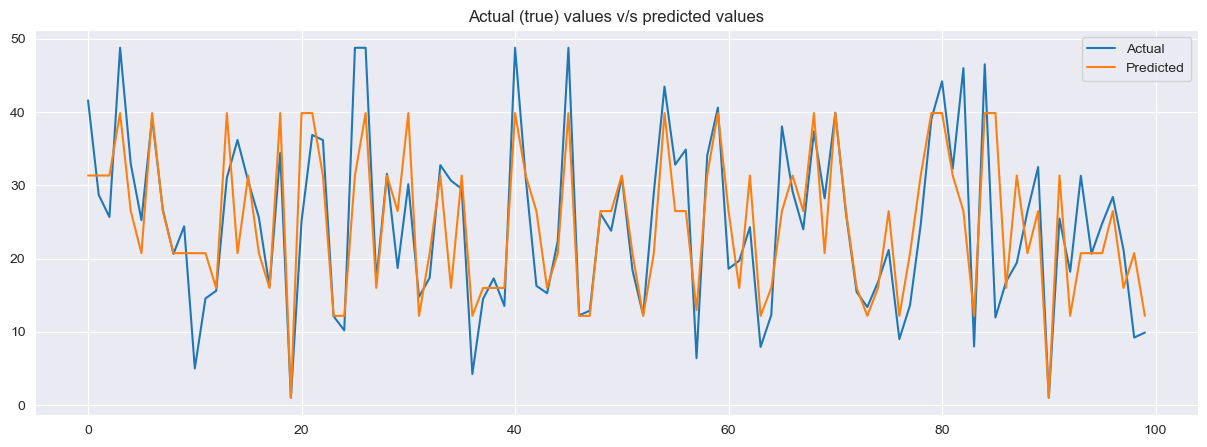

In [108]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

In [109]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display

# You can use matplotlib instead
import matplotlib.pyplot as plt

# Option 1: Using Graphviz (if properly installed)
try:
    graph = Source(tree.export_graphviz(dtree_tts, out_file=None
       , feature_names=df[independent_variables].columns
       , filled = True))
    display(SVG(graph.pipe(format='svg')))
except:
    # Option 2: Using matplotlib as fallback
    plt.figure(figsize=(20,10))
    tree.plot_tree(dtree_tts, feature_names=df[independent_variables].columns, filled=True)
    plt.show()

### Cross Validation

In [110]:
# Fitting Decision tree regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
param_dict = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
dtree_reg = GridSearchCV(dtree, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
dtree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [111]:
# Best estimators
dtree_reg_best_est=dtree_reg.best_estimator_
print(f'The best estimator values : {dtree_reg_best_est}')

The best estimator values : DecisionTreeRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=0)


In [112]:
# best fit values
dtree_reg_best_params=dtree_reg.best_params_
print(f'The best fit values: {dtree_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [113]:
# Mean cross-validated score of the best_estimator of model
dtree_reg_score=dtree_reg.best_score_
print(f" The negative mean squared error is: {dtree_reg_score}")

 The negative mean squared error is: -32.59639088001881


In [114]:
# Predicting results for train and test set
y_train_pred=dtree_reg.predict(X_train)
y_test_pred=dtree_reg.predict(X_test)

In [115]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 25.937913705659398
Root mean squared error (RMSE): 5.092927812728097
Mean absolute error (MAE): 3.5514584501708315
R2 Square 0.8273252640474638
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 31.133314424881817
Root mean squared error (RMSE): 5.579723507924189
Mean absolute error (MAE): 3.852156632102568
R2 Square 0.7908913510086917
____________________________________


In [116]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.8270043072891877
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7893272471899995


In [117]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.19268496619688838


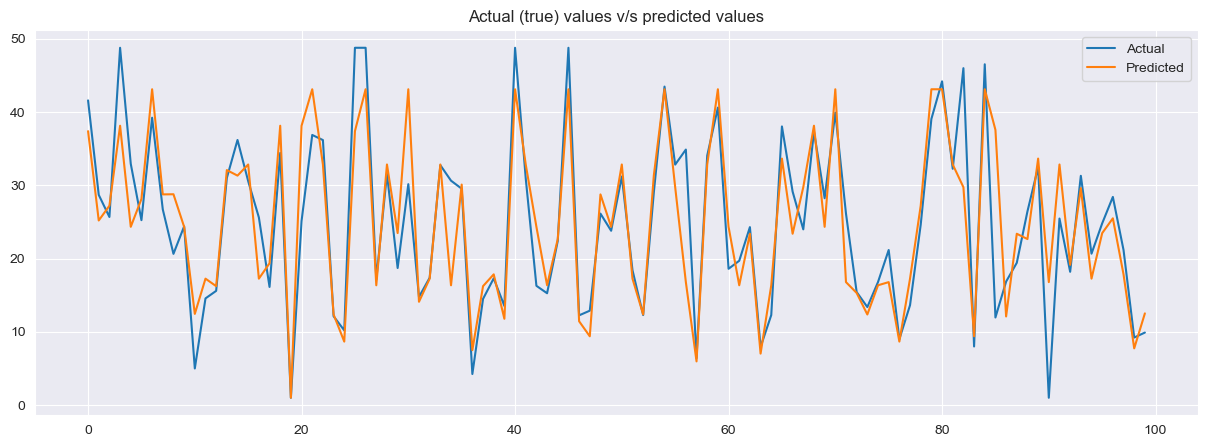

In [118]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

In [119]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Option 1: Text representation of the tree
text_representation = export_graphviz(dtree_reg.best_estimator_,
                                     feature_names=df[independent_variables].columns,
                                     filled=True,
                                     out_file=None)
print(text_representation[:500] + "...\n(Output truncated)")

# Option 2: Feature importance visualization
plt.figure(figsize=(10, 6))
features = df[independent_variables].columns
importances = dtree_reg.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

# Option 3: Decision paths for sample data points
# Take a few sample data points
n_samples = 5
samples = df[independent_variables].sample(n_samples)

# Get decision paths
decision_paths = dtree_reg.best_estimator_.decision_path(samples)

# Visualize decision paths
plt.figure(figsize=(12, 8))
for i in range(n_samples):
    path = decision_paths[i].indices
    plt.plot(path, [i] * len(path), 'o-', label=f'Sample {i+1}')
    
plt.yticks(range(n_samples), [f'Sample {i+1}' for i in range(n_samples)])
plt.xlabel('Node Index')
plt.ylabel('Sample')
plt.title('Decision Paths for Sample Data Points')
plt.legend()
plt.grid(True)
plt.show()

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Temperature(°C) <= 0.522\nsquared_error = 150.213\nsamples = 7008\nvalue = 23.447", fillcolor="#f1bc95"] ;
1 [label="Hour <= 0.283\nsquared_error = 68.913\nsamples = 3220\nvalue = 17.161", fillcolor="#f5cfb3"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Hour <= 0.109\nsquared_error = 30.415\nsamples = 1109\nvalue = 12.179", fillcolor="#f8dec...
(Output truncated)


### [6] Random Forest

### train_test_split

In [120]:
# Fitting Random Forest Regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_tts=RandomForestRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
rf_tts.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=0)

In [121]:
# Score of the model
rf_tts_score=rf_tts.score(X_train, y_train)
print(f'Score of the model : {rf_tts_score}')

Score of the model : 0.7535527693815874


In [122]:
# Predicting results for train and test set
y_train_pred_tts=rf_tts.predict(X_train)
y_test_pred_tts=rf_tts.predict(X_test)

In [123]:
# Predicting results for train and test set
y_train_pred_tts=rf_tts.predict(X_train)
y_test_pred_tts=rf_tts.predict(X_test)

In [124]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.7530946890272782
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7415301916605349


In [125]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.24656429565274984


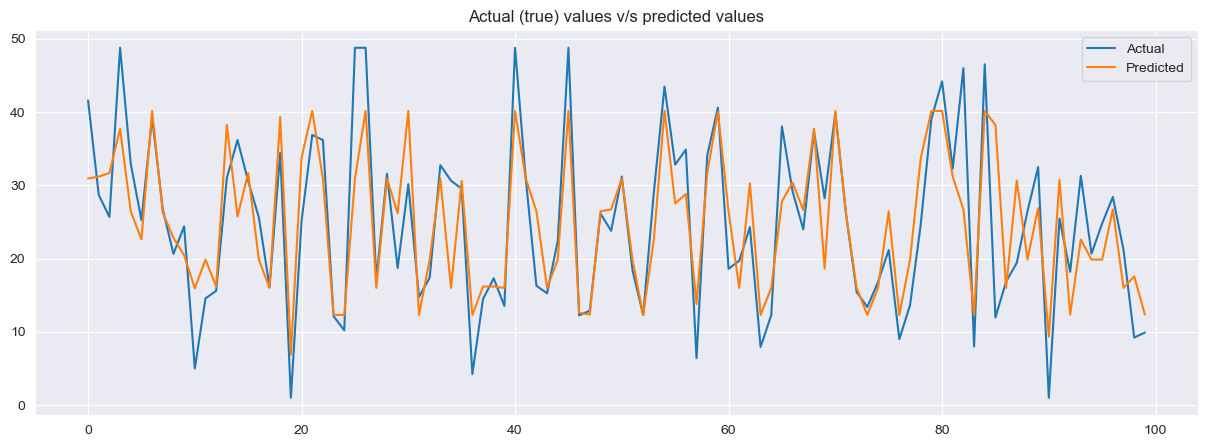

In [126]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

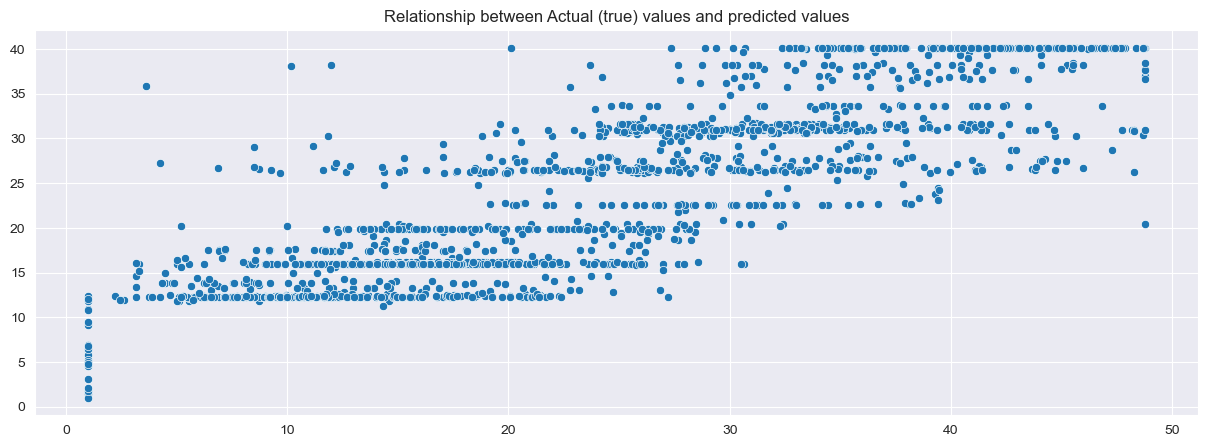

In [127]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

### Cross Validation

In [152]:
# Fitting Random Forest regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_cv = RandomForestRegressor(random_state=42)
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
rf_reg = GridSearchCV(rf_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [153]:
# Best estimators
rf_reg_best_est=rf_reg.best_estimator_
print(f'The best estimator values : {rf_reg_best_est}')

The best estimator values : RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=42)


In [154]:
# best fit values
rf_reg_best_params=rf_reg.best_params_
print(f'The best fit values: {rf_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [155]:
# Mean cross-validated score of the best_estimator of model
rf_reg_score=rf_reg.best_score_
print(f" The negative mean squared error is: {rf_reg_score}")

 The negative mean squared error is: -26.282798017039305


In [156]:
# Predicting results for train and test set
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)

In [157]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 23.123204586171997
Root mean squared error (RMSE): 4.808659333553583
Mean absolute error (MAE): 3.412626647141012
R2 Square 0.8460634385786188
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 25.80579906283969
Root mean squared error (RMSE): 5.079940852297366
Mean absolute error (MAE): 3.5967812184381867
R2 Square 0.8266739061402691
____________________________________


In [158]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.8457773111410325
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.8253774508927567


In [159]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.2164243151939165


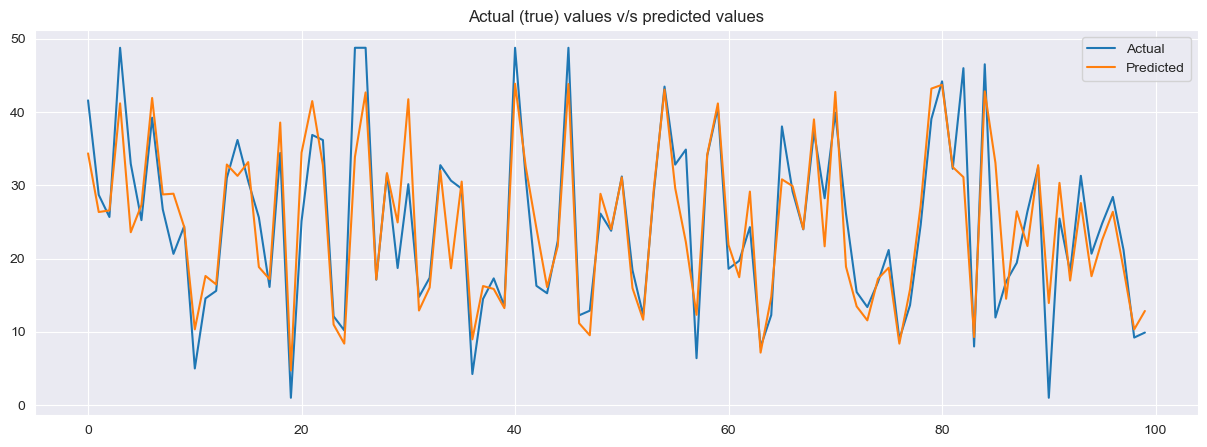

In [160]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

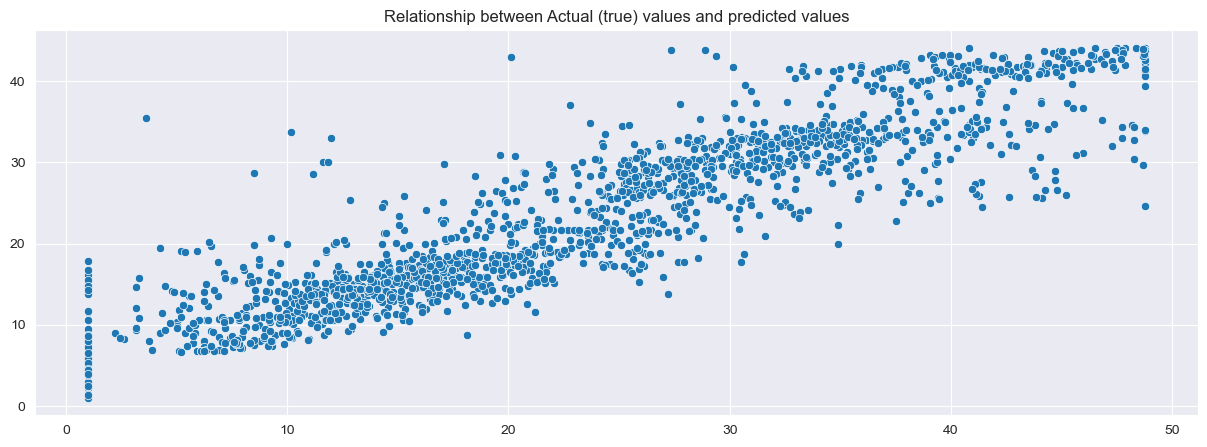

In [161]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## [7] XGBoost

### Cross Validation

In [162]:
# Fitting XGBoost regression model to training set
import xgboost as xgb
xgb_cv = xgb.XGBRegressor(random_state=0)

param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
xgb_reg = GridSearchCV(xgb_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=3)
xgb_reg.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [163]:
# Best estimators
xgb_reg_best_est=xgb_reg.best_estimator_
print(f'The best estimator values : {xgb_reg_best_est}')

The best estimator values : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, min_samples_leaf=40,
             min_samples_split=50, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, ...)


In [164]:
# best fit values
xgb_reg_best_params=xgb_reg.best_params_
print(f'The best fit values: {xgb_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [165]:
# Mean cross-validated score of the best_estimator of model
xgb_reg_score=xgb_reg.best_score_
print(f" The negative mean squared error is: {xgb_reg_score}")

 The negative mean squared error is: -16.101818160457622


In [166]:
# Predicting results for train and test set
y_train_pred=xgb_reg.predict(X_train)
y_test_pred=xgb_reg.predict(X_test)

In [167]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 0.5475640066201338
Root mean squared error (RMSE): 0.7399756797490941
Mean absolute error (MAE): 0.5061775760658498
R2 Square 0.9963547388069375
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 14.35799897374746
Root mean squared error (RMSE): 3.7891950297850148
Mean absolute error (MAE): 2.4668907365108717
R2 Square 0.903563696217984
____________________________________


In [168]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.9963479632285117
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.9028423659825604


In [169]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.19065563966472762


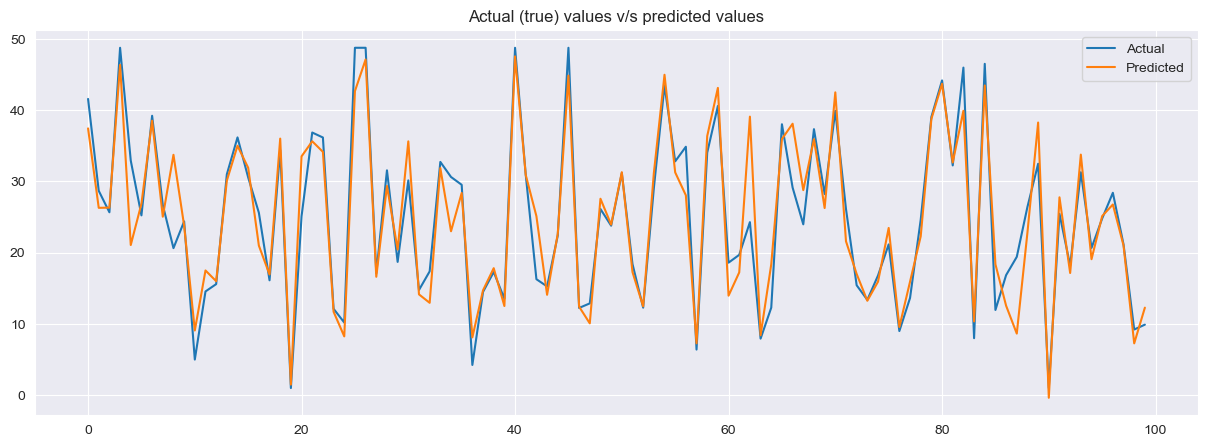

In [170]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

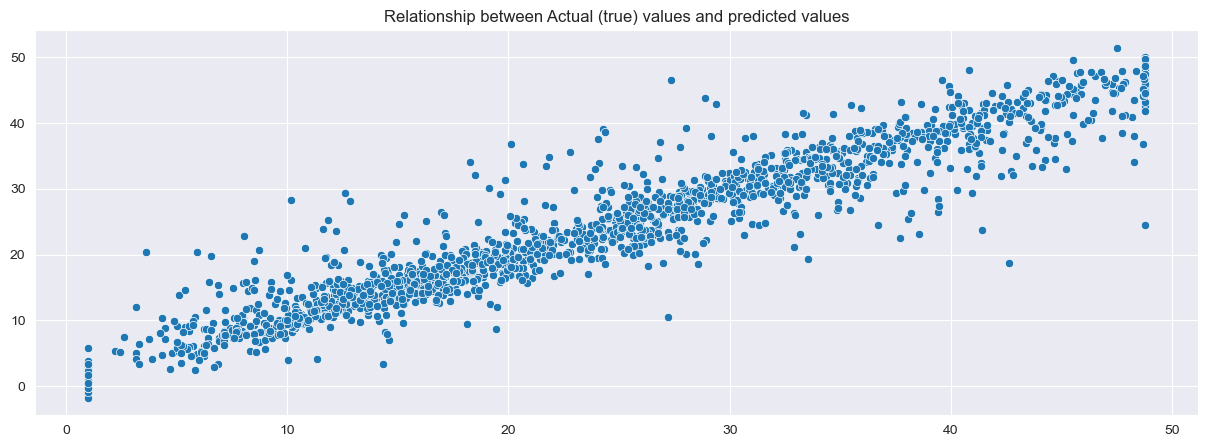

In [171]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## Comparing Different Models based on the Evaluation Metrics

In [172]:
# import module
from tabulate import tabulate
 
# Assign data
mydata = [
    ['Linear regression',"56.11071", "7.49070", '5.79057','0.623129','0.6205286','0.184718'],
    ['Lasso (L1)',"56.1015", "7.490094", '5.7906075','0.62319105','0.62059087','0.184956'],
    ['Ridge (L2)',"56.108121", "7.4905354", '5.791172','0.623146','0.6205401','0.184706'],
    ['ElasticNet',"56.1078", "7.49051", '5.79069','0.623148','0.620548','0.184721'],
    ['Decision Tree','31.4790',"5.61062", '3.8559','0.788568','0.787109','0.207377'],
    ['Random Forest',"26.070", "5.1034", '3.6223','0.8248','0.8237','0.2243'],
    ['XGBoost',"14.19", "3.80", '2.43','0.9026','0.9007','0.1463']
]
 
# Create header for table
head = ['ML Model Name',"MSE", "RMSE", 'MAE','R-squared','Ad. R-squared','Mean of Residuals']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print('Note : Highest evaluation metric are taken into consideration between train_test_split and cross validation from each model')

+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ML Model Name     |     MSE |    RMSE |     MAE |   R-squared |   Ad. R-squared |   Mean of Residuals |
+===================+=========+=========+=========+=============+=================+=====================+
| Linear regression | 56.1107 | 7.4907  | 5.79057 |    0.623129 |        0.620529 |            0.184718 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Lasso (L1)        | 56.1015 | 7.49009 | 5.79061 |    0.623191 |        0.620591 |            0.184956 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Ridge (L2)        | 56.1081 | 7.49054 | 5.79117 |    0.623146 |        0.62054  |            0.184706 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ElasticNet        | 56.1078 | 7.49051 | 5.79

### Comparing R-squared, RMSE and Mean of Residuals of different models

In [173]:
# Creating Dataframe of required data
evaluation_df=pd.DataFrame({'Model':['Linear regression','Lasso (L1)','Ridge (L2)','ElasticNet','Decision Tree','Random Forest','XGBoost'],
                      'R_squared':[0.623129,0.623191,0.623146,0.623148,0.788568,0.8251,0.9026],
                       'RMSE':[7.4907,7.49009,7.49054,7.49051,5.61062,5.1034,3.80],
                       'Mean of Residuals':[0.184718,0.184956,0.184706,0.184721,0.207377,0.22154,0.1463]})
# Dataset
evaluation_df

Model  R_squared     RMSE  Mean of Residuals
0  Linear regression   0.623129  7.49070           0.184718
1         Lasso (L1)   0.623191  7.49009           0.184956
2         Ridge (L2)   0.623146  7.49054           0.184706
3         ElasticNet   0.623148  7.49051           0.184721
4      Decision Tree   0.788568  5.61062           0.207377
5      Random Forest   0.825100  5.10340           0.221540
6            XGBoost   0.902600  3.80000           0.146300

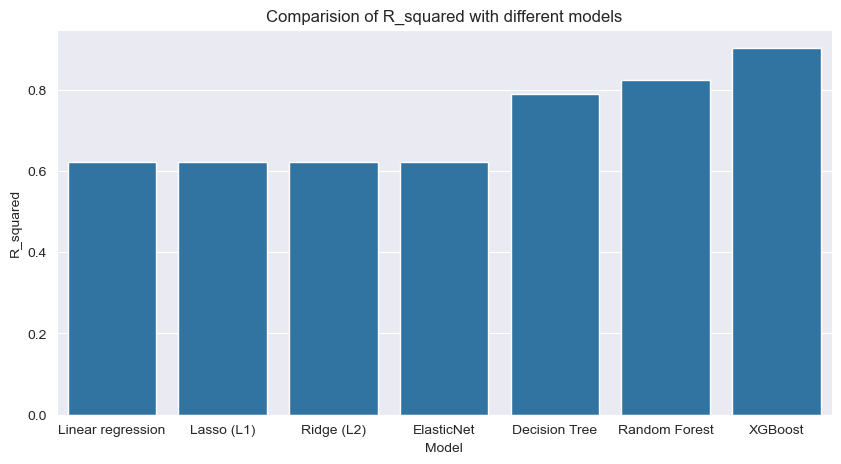

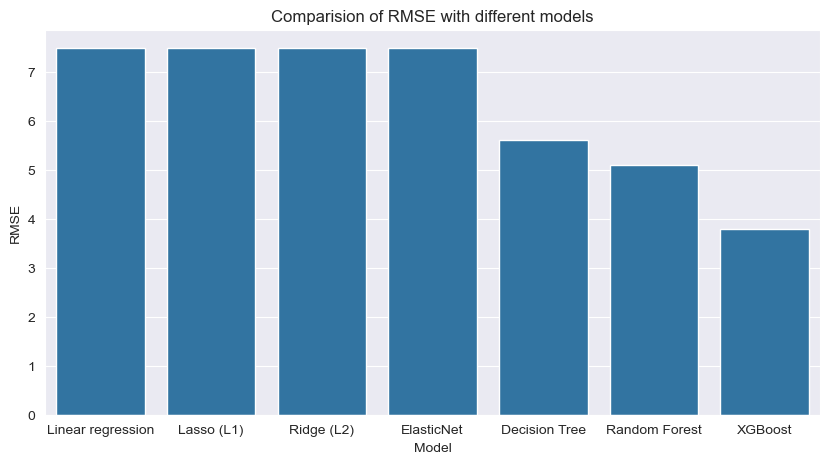

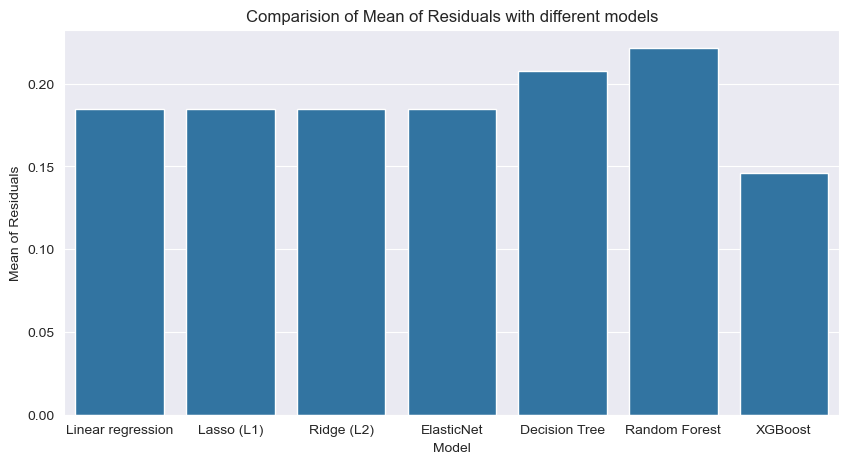

In [174]:
# Plotting bar plot to compare score and error of each model
for var in ['R_squared','RMSE','Mean of Residuals']:
    plt.figure(figsize=(10,5))
    ax=sns.barplot(x=evaluation_df['Model'],y=evaluation_df[var])
    ax.set_title(f'Comparision of {var} with different models')
    plt.show()